# Draft analysis 

---

Group name: Lena Breitberg, Ji Huixiao, Paraskevas Papadopoulos

---


## Introduction

Der Immobilienmarkt als komplexer Wirtschaftszweig steht im Fokus dieses Projekts, das die Determinanten der Wohnungspreise in Nürnberg untersucht. Besonderes Augenmerk liegt auf der staatlichen Förderung energetischer Sanierungen von Wohngebäuden in Deutschland. Das Projekt prüft, ob zum Verkauf stehende Wohnungen in Nürnberg bereits einer energetischen Sanierung unterzogen wurden, was sowohl für Fördergeber als auch andere Marktteilnehmer von Interesse ist.

### Motivation

Eine Immobilie setzt sich aus verschiedenen Merkmalen zusammen, von denen jedes den Gesamtwert beeinflussen kann. Der Preis der individuellen Merkmale kann jedoch nicht direkt beobachtet werden. In ihrer Arbeit von 1980 vergleichen Malpezzi, Ozanne und Thibodeau Immobilien mit einem Einkaufswagen für Lebensmittel. Jeder Lebensmittelwagen eines Haushalts enthält unterschiedliche Lebensmittel - genauso heterogen wie Immobilien. Im Gegensatz zu Lebensmitteln kann der Preis einzelner Immobilienmerkmale jedoch nicht direkt beobachtet werden. Die Heterogenität auf dem Wohnungsmarkt bezieht sich darauf, dass Wohnungen unterschiedliche Merkmale aufweisen, sei es in Bezug auf Größe, Ausstattung, Lage oder andere Eigenschaften. Da die Präferenzen und Bedürfnisse der Verbraucher variieren, ist es naheliegend anzunehmen, dass diese verschiedenen Merkmale unterschiedlich bewertet werden.

Die hedonische Regressionsanalyse wird oft verwendet, um den marginalen Beitrag einzelner Merkmale zum Gesamtwert einer Immobilie zu schätzen. Diese Methode reicht mindestens bis zu Court (1939) und Griliches (1961) zurück, während Lancaster (1966) und Rosen (1974) die konzeptuellen Grundlagen für diesen Ansatz legten. Lancaster's (1966) Ansatz, auf den Immobilienmarkt bezogen, betont, dass nicht die Immobilie selbst, sondern die individuellen Merkmale den Nutzen schaffen. Rosen's (1974) Ansatz wiederum beschreibt, dass der Preis einer Immobilie die Summe der individuellen Preise ihrer Merkmale ist. Das hedonische Modell versucht, die Vielfalt und Unterschiede in den Immobilien zu berücksichtigen, indem es eine analytische Struktur schafft, die es ermöglicht, den Beitrag jedes einzelnen Merkmals zum Gesamtpreis einer Immobilie zu quantifizieren. Es erfolgt lediglich die Bewertung der spezifischen Merkmale der Immobilie, nicht jedoch der Immobilie als Gesamtheit.

Aufgrund der Nichtlinearität von Immobilienpreise werden in vielen Studien log-lineare Modelle verwendet (vgl. Malpezzi 2003). Diese Modelle ermöglichen eine Variation im Geldwert eines bestimmten Merkmals, wodurch der Preis dieses Merkmals teilweise von anderen Merkmalen der Immobilien abhängt. Im Handbuch zu Immobilien-Preisindizes des Statistischen Amtes der Europäischen Union u.a. (2013) erwähnen die Autoren, dass log-lineare Modelle relativ besser funktionieren, wenn die Grundstücksgröße nicht als unabhängige Variable einbezogen wird (weil diese möglicherweise nicht vorliegt).

Sirmans und Macpherson (2003) fassen aus mehreren Studien die wichtigsten Immobilienmerkmale zusammen, die zur Spezifizierung hedonischer Preisgleichungen verwendet wurden. Dazu gehören das Baujahr der Immobilie, die Quadratmeteranzahl, Garage, Kamin und Grundstücksgröße. Weitere relevanten Merkmale sind Schlafzimmer, Badezimmer, Swimmingpool und Keller. Zudem scheint die Zeit auf dem Markt sehr oft als Merkmal zu fungieren. In den meisten Studien zeigen die Merkmale den erwarteten Effekt auf den Verkaufspreis: Das Alter und die Zeit auf dem Markt haben meistens einen negativen Einfluss, während alle anderen Merkmale oft einen positiven Effekt auf den Verkaufspreis aufweisen.

Theoretisch können unendlich viele Merkmale einer Immobilie als unabhängige Variablen fungieren. Laut Malpezzi (2003, S. 7) sollte ein vollständiger Datensatz mindestens möglichst folgende Immobilienmerkmale enthalten:

- Zimmer, insgesamt und nach Typ (Schlafzimmer, Badezimmer, etc.)
- Wohnfläche
- Immobilientyp (Wohnung, Haus, etc.)
- Heizungsart
- Baujahr
- Andere strukturelle Merkmale (Keller, Kamin, Garage, etc.)
- Baumaterialien
- Nachbarschaftsvariablen (Schulqualität, etc.)
- Zugang zu Annehmlichkeiten (Einkaufszentren, Schulen, etc.)
- Merkmale des Mieters (Dauer, etc.)

Es ist erkennbar, dass einige dieser unabhängigen Variablen eine hohe Korrealtion aufweisen können. Zum Beispiel könnte eine Nachbarschaftsvariable im Modell als hoch signifikant erscheinen, aber in Wirklichkeit spiegelt die statistische Signifikanz möglicherweise die Nähe zu einer bestimmten Annehmlichkeit wider. Aufgrund dessen kann die Interpretation der individuellen Koeffizienten schwieriger sein (Sirmans und Macpherson, 2003). Im Handbuch zu Immobilien-Preisindizes des Statistischen Amtes der Europäischen Union u.a. (2013) raten die Autorern eine relevante Variable einzubeziehen, selbst wenn dies zu Multikollinearität führen kann, als sie auszulassen, da letzteres zu einem Bias durch weggelassene Variablen führen würde. Die Autoren führen weiter auf, dass die Entscheidung oft von den spezifischen Anforderung der Analyse abhängt.

Um die zweite Forschungsfrage zu beantworten, greift diese Studie auf einen innovativen Ansatz zurück, indem sie erstmalig versucht, mithilfe einer Klassifikationsregression die Energieeffizienzklasse von Wohnungen in Nürnberg vorherzusagen. Die Auswahl der unabhängigen Variablen, insbesondere Baujahr und Heizungsart, reflektiert die Relevanz dieser Faktoren für die energetische Bewertung. Zusätzlich werden im Modell weitere Variablen als Kontrollvariablen berücksichtigt. Die Hypothesen dieser Untersuchung zielen darauf ab, statistische Signifikanz in den einzelnen Variablen nachzuweisen. Fehlende Signifikanz der Variablen Baujahr und Heizungsart könnte darauf hinweisen, dass die durchgeführten Förderprogramme ihren Zweck erfüllt und eine positive Veränderung in der Energieeffizienzklasse bewirkt haben (unter der Annahme, dass je älter ein Gebäude ist und keine Sanierung erfolgte, desto niedriger die Energieeffizienzklasse ist).

### Allgemeine Forschungsfrage

Wie beeinflussen verschiedene Merkmale wie Wohnungsgröße, Anzahl der Schlafzimmer und Badezimmer, Stadtviertel, Nähe zu lokalen Annehmlichkeiten, Alter der Wohnung, energetische Effizienz und Nähe zum Nahverkehr in ihrer Gesamtheit den Preis von Wohnungen auf dem Immobilienmarkt?

Inwiefern kann die Energieeffizienzklasse von Wohnungen in Nürnberg anhand ausgewählter Variablen wie Baujahr und Heizungsart prognostiziert werden?

### Hypothesen

H1: Die Wohnungsgröße einer Wohnung übt einen positiven linearen Einfluss auf den Preis aus, wobei größere Wohnungen höhere Preise auf dem Immobilienmarkt erzielen.

H2: Die Anzahl der Schlafzimmer einer Wohnung hat einen positiven, linearen Zusammenhang mit dem Preis, wobei Wohnungen mit mehr Schlafzimmern zu höheren Preisen angeboten werden.

H3: Die Anzahl der Badezimmer einer Wohnung hat einen positiven, linearen Effekt auf den Preis, sodass Wohnungen mit einer höheren Anzahl von Badezimmern zu höheren Preisen verfügbar sind.

H4: Das Stadtviertel, in dem sich die Wohnung befindet, hat einen signifikanten, möglicherweise nicht-linearen Einfluss auf den Preis, wobei bestimmte Stadtviertel höhere Preise aufweisen können als andere.

H5: Die Nähe zu lokalen Annehmlichkeiten des täglichen Bedarfs hat einen positiven linearen Effekt auf den Preis, da eine bessere Erreichbarkeit dieser Einrichtungen den Wert der Wohnung steigert.

H6: Das Alter einer Wohnung hat einen negativen linearen Einfluss auf den Preis, wobei neuere Wohnungen tendenziell höhere Preise erzielen.

H7: Eine verbesserte energetische Effizienz einer Wohnung hat einen positiven, möglicherweise nicht-linearen Effekt auf den Preis, da energieeffiziente Wohnungen als qualitativ hochwertiger angesehen werden könnten.

H8: Die Nähe zum Nahverkehr hat einen positiven linearen Einfluss auf den Preis, wobei Wohnungen in der Nähe von Nahverkehrsinfrastruktur zu höheren Preisen angeboten werden.

H9: Unter der Annahme, dass ältere Gebäude tendenziell über weniger effiziente Energieinfrastrukturen verfügen, wird die Hypothese aufgestellt, dass das Baujahr eines Gebäudes einen statistisch signifikanten Einfluss auf die vorhergesagte Energieeffizienzklasse hat. Es wird erwartet, dass neuere Baujahre mit höheren Energieeffizienzklassen assoziiert sind.

H10: In Anbetracht der Vielfalt von Heizungstechnologien und ihrer unterschiedlichen Effizienzgrade wird die Hypothese formuliert, dass die Art der Heizung einen statistisch signifikanten Einfluss auf die vorhergesagte Energieeffizienzklasse hat. Es wird erwartet, dass bestimmte Heizungsarten mit einer höheren Energieeffizienzklasse korrelieren, während andere mit einer niedrigeren Klasse in Verbindung gebracht werden könnten.

## Setup



In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import ast
import warnings
from sklearn.exceptions import UndefinedMetricWarning

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import altair as alt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Data description

Der Datensatz umfasst Informationen zu Wohnungen, die am 09.11.2023 auf der [Immowelt-Website](https://www.immowelt.de) zum Kauf in Nürnberg verfügbar waren. Jede Beobachtung repräsentiert ein bestimmtes Immobilienangebot und enthält Details wie Baujahr, Preis, Standort und zusätzliche relevante Merkmale. 

Die Daten wurden durch das Scrapen der Immowelt-Website am 09.11.2023 gesammelt. Der Prozess umfasste die Anwendung von Web-Scraping-Techniken, um Informationen aus den Immobilienangeboten der Website zu extrahieren und dabei spezifische Suchkriterien zu berücksichtigen (Ort=Nürnberg, Immobilientyp=Wohnung, Transaktionstyp=Kauf). Jede Beobachtung im Datensatz entspricht einem eindeutigen Immobilienangebot, das auf Immowelt verfügbar war.

Der ursprüngliche Kurator der Daten ist in diesem Fall Immowelt, das als umfassende Plattform für Immobilienangebote fungiert. Immowelt sammelt und präsentiert Immobilieninformationen, die von Immobilienverkäufern, Immobilienmaklern und anderen Beteiligten eingereicht werden. 

## Daten importieren

In [2]:
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg.csv"
df = pd.read_csv(ROOT + DATA)

### Datenstruktur

In [3]:
# Zeige die ersten Zeilen
pd.set_option('display.max_columns', None)
df.head()

,General.EstateTypeKey,General.ReferenceNumber,General.DistributionTypeKey,General.ConstructionYear,General.LivingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_features,Tealium.object_objektart_sub,Tealium.expose_type,Tealium.broker_guid,Tealium.object_count_photos,LocalRatings.scores.local_amenities,LocalRatings.scores.mobility,MetaBadges,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,Latitude,Longitude,Stadtteil,Stadt,PRICE,ROOMS,PRICE_COMMONCHARGE,EnergyType,Class,Value,CATEGORY,FLOOR,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,PARKINGSLOT,ENERGY,BUILDINGTYPE,HEATING,ELEVATOR,EQUIPMENTS
0,WOHNUNG,001/G1/E114,ZUM_KAUF,2023.0,247.07,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...",wohnung,project,4821481,15.0,7.7,9.5,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,Nürnberg,2539000.0,7.0,NaN,NaN,NaN,NaN,NaN,11. Geschoss,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fußbodenheizung,Personenaufzug,NaN
1,WOHNUNG,NaN,ZUM_KAUF,1900.0,69.00,493430,False,90461,EUR,"['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...",MAISONETTE,standard,2704438,23.0,6.5,9.7,[],COMMISSION_REQUIRED,Nürnberg,90461,NaN,96453B9B5899480AB506126D5E0E9140,2704438,Immobilien Büro Franken24 UG (haftungsbeschränkt),NaN,NaN,NaN,49.42749,11.07581,Gibitzenhof,Nürnberg,225000.0,2.0,280.0,NaN,NaN,NaN,Maisonette,4. Geschoss (Dachgeschoss),vermietet,WG-geeignet,renoviert / saniert,NaN,NaN,Gas,NaN,Etagenheizung,NaN,NaN
2,WOHNUNG,NaN,ZUM_KAUF,1972.0,69.46,493465,False,90473,EUR,"['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...",wohnung,standard,7111707,1.0,5.7,7.8,[],COMMISSION_DEFAULT,Nürnberg,90473,NaN,9C587ED116BD427E9DD13790553F0A5F,7111707,W &a; F Liegenschaften GmbH,NaN,NaN,NaN,49.40815,11.13376,Langwasser,Nürnberg,195000.0,3.0,283.0,NaN,NaN,NaN,NaN,8. Geschoss,vermietet,NaN,gepflegt,NaN,Tiefgarage,Fernwärme,NaN,NaN,NaN,NaN
3,WOHNUNG,X4_301,ZUM_KAUF,2023.0,82.81,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,483623.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,3. Geschoss,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN
4,WOHNUNG,X4_204,ZUM_KAUF,2023.0,75.52,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,433956.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,2. Geschoss (Erdgeschoss),NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN


In [4]:
# Datenübersicht (mit Metadaten)
# Zeige alle Variablen im Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   General.EstateTypeKey                                  961 non-null    object 
 1   General.ReferenceNumber                                832 non-null    object 
 2   General.DistributionTypeKey                            961 non-null    object 
 3   General.ConstructionYear                               961 non-null    float64
 4   General.LivingSpace                                    961 non-null    float64
 5   Tealium.object_locationid                              961 non-null    int64  
 6   Tealium.object_address_is_visible                      961 non-null    bool   
 7   Tealium.object_zip                                     961 non-null    int64  
 8   Tealium.object_currency                           

### Datenkorrekturen

#### Umbenennung der in der Analyse verwendeten Spalten (einschließlich einer kurzen Beschreibung)

In [5]:
df.rename(columns={
    # Allgemeine Immobilieninformationen
    'General.EstateTypeKey': 'estateTypeKey',             # Immobilientyp (Wohnung oder Haus)
    'General.DistributionTypeKey': 'distributionTypeKey', # zum Kauf oder zur Miete
    'General.ReferenceNumber': 'referenceNumber',         # Referenznummer, vergeben durch Immobilienmakler; erforderlich zur Identifizierung von Duplikate; liegt nicht für alle Objekte vor    'General.DistributionTypeKey': 'distributionTypeKey', # Neubau- oder Bestandswohnung 
    'General.ConstructionYear': 'constructionYear',       # Baujahr der Immobilie
    'General.LivingSpace': 'livingSpace',                 # Wohnfläche der Immobilie in Quadratmetern

    # Tealium Objektinformationen
    'Tealium.object_features': 'objectFeatures',         # Weitere Merkmale der Immobilie
    'Tealium.broker_guid': 'brokerGuid',                 # eindeutige Makler-ID (nur für Immobilien vorhanden, welche durch einen Makler verwaltet werden)
    'Tealium.object_count_photos': 'photosCount',        # Anzahl der Fotos

    # Bewertungen vor Ort
    'LocalRatings.scores.local_amenities': 'localAmenitiesScore', # Bewertung der 'lokalen Annehmlichkeiten', durch "immowelt" vergeben
    'LocalRatings.scores.mobility': 'localMobilityScore',         # Bewertung der 'Mobilität und Verkehrsanbindung', durch "immowelt" vergeben

    # Metainformationen
    'MetaBadges': 'metaBadges', # Metabadge-Informationen, wie "Zwangsversteigerung"

    # Preisinformationen
    'PRICE': 'price', # Preis der Immobilie

    # Standortinformationen
    'Latitude': 'latitudeDistrict',    # Breitengrad des Stadtteils
    'Longitude': 'longitudeDistrict',  # Längengrad des Stadtteils
    'Stadtteil': 'district',           # Stadtteil der Immobilie
    'Stadt': 'town',                   # Stadt der Immobilie

    # Energieinformationen
    'Class': 'energyClass',        # Energieeffizienzklasse des Objektes
    'Value': 'energyConsumption',  # Energieverbrauch (Zur Schätzung von energyClass bei fehlenden Werten) des Objektes
    'ENERGY': 'energy',            # Hauptenergieträger des Objektes

    # Informationen zu den Zimmern
    'ROOMS': 'rooms',  # Anzahl der Zimmer

    # Weitere Einzelheiten zur Immobilie
    'FLOOR': 'floor',               # Etage
    'PARKINGSLOT': 'parkingSlot',   # privater Parkplatz verfügbar
    'ELEVATOR': 'elevator',         # Aufzug vorhanden

}, inplace=True)

#### Prüfung auf Duplikate

Wir suchen nach Duplikaten in den Referenznummern (referenceNumber) innerhalb desselben Maklers (Gruppierungsvariable: brokerGuid), da Duplikate nur innerhalb desselben Maklers auftreten können. Die Annahme ist, dass Eigentümer nur einen Makler beauftragen, um mögliche höhere Maklerkosten zu vermeiden.

Darüber hinaus überprüfen wir, ob der Datensatz identische Datensätze enthält.

Die Variablen, die für diese Prüfungen verwendet wurden, werden anschließend aus dem DataFrame entfernt, da sie keinen weiteren Mehrwert bieten.

In [6]:
#  Gruppierung anhand von 'brokerGuid' und 'referenceNumber'
duplicateCount = df.groupby(['brokerGuid', 'referenceNumber']).size().reset_index(name='Duplicate Count').sort_values(by='Duplicate Count', ascending=False)
#print(duplicateCount)

# Prüfung auf Duplikate
if duplicateCount['Duplicate Count'].eq(1).all():
    print("Keine Duplikate innerhalb desselben Maklers gefunden")

# Überprüfung auf identische Zeilen
identicalRows = df[df.duplicated()]
if identicalRows.empty:
    print("Keine identischen Zeilen gefunden")

Keine Duplikate innerhalb desselben Maklers gefunden
Keine identischen Zeilen gefunden


In [7]:
df.drop(columns=['referenceNumber', 'brokerGuid'], inplace=True)

##### Zerlegen der Immobilienmerkmale aus der Spalte "Tealium.object_features"

Die Variable 'Tealium.object_features' enthält verschiedene Merkmale für einzelne Immobilien. In unserem Vorgehen beabsichtigen wir, basierend auf den darin vorkommenden Wörtern Dummy-Variablen zu erstellen. Dabei werden nur solche Merkmale berücksichtigt, von denen wir annehmen, dass sie einen klaren Verkaufsvorteil bieten und die von jedem Verkäufer angegeben werden.

Da es wahrscheinlich ist, dass diese Variable bei Immowelt eine Kombination aus Auswahlfeldern und Freitextfeldern ist, legen wir besonderen Wert auf die Identifizierung ähnlicher Schreibweisen und Synonyme für diese Merkmale. 

Nachdem die Dummy-Variablen erstellt wurden, entfernen wir die Variable 'Tealium.object_features' aus dem DataFrame, da sie keinen weiteren Mehrwerte für unsere Analyse bietet. 

In [8]:
import re
from collections import Counter

# Funktion um Wörter direkt aus einem String zu extrahieren
def extractWords(s):
    # Wörter auf Bais folgender Zeichenfolgen extrahieren
    return re.findall(r'\b\w+\b', s)

# Erstellung einer flachen Liste mit den extrahierten Wörter
directExtractedWords = df['objectFeatures'].apply(extractWords)
allWords = [word for sublist in directExtractedWords for word in sublist]

# Häufigkeit jedes Wortes
wordCounts = Counter(allWords)

# Konvertierung in einem Dataframe
words_df = pd.DataFrame(wordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
pd.set_option('display.max_rows', None)
words_df

,Word,Frequency
8,Kelleranteil,721
35,Balkon,476
9,Personenaufzug,464
24,GAS,441
1,WANNE,433
13,FLIESEN,426
6,DUSCHE,404
48,Zentralheizung,379
56,Einbauküche,353
31,Kunststofffenster,348


In [9]:
# Funktion zum Analysieren der Zeichenketten
def parseFeatures(feature_str):
    try:
        features = ast.literal_eval(feature_str)
        if isinstance(features, list):
            return features
        else:
            return []
    except:
        return []

# Anwenden auf die Spalte 'objectFeatures'
df['objectFeatures'] = df['objectFeatures'].apply(parseFeatures)

# Erstellen von Dummy-Variablen (auf Basis des Dataframe 'words_df')
commonFeatures = ['Kamin','kamin', 'Personenaufzug', 'Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'sauna', 'swimmingpool', 'KÜCHE', 'Küche', 'Einbauküche', 'Balkon', 'Terrasse', 'Garten', 'Loggia', 'Kelleranteil', 'abstellraum', 'gaestewc', 'WC', 'rollstuhlgerecht', 'BETREUTES_WOHNEN']

for feature in commonFeatures:
    df[feature] = df['objectFeatures'].apply(lambda x: 1 if feature in x else 0)

df.drop('objectFeatures', axis=1, inplace=True)

#### Prüfung auf Einhaltung der Suchkriterien

Um sicherzustellen, dass die ursprünglichen Suchkriterien (Wohnungen zum Kauf in Nürnberg) eingehalten werden führen wir folgende Prüfungen durch:

- Berücksichtigung von Wohnungen: Wir beschränken unsere Analyse auf Wohnungen und schließen andere Arten von Immobilien aus.

- Betrachtung nur Wohnungen zum Kauf (keine Mietwohungen): Unsere Analyse konzentriert sich ausschließlich auf Wohnungen, die zum Verkauf stehen.

- Beschränkung auf Nürnberg: Unsere Analyse bezieht sich ausschließlich auf Wohnungen, die sich in der Stadt Nürnberg befinden.

Immobilien, die diese Kriterien nicht erfüllen, werden aus dem Datensatz entfernt, um die Datenqualität und Relevanz unserer Analyse sicherzustellen. Variablen, die für diese Prüfungen verwendet wurden und voraussichtlich keinen weiteren Mehrwert bieten, werden im Anschluss aus dem DataFrame entfernt.

In [10]:
# Häufigkeit bestimmen
valueCountsList = [
    df['estateTypeKey'].value_counts().rename('estateTypeCount'),
    df['distributionTypeKey'].value_counts().rename('distributionTypeKeyCount'),
    df['town'].value_counts().rename('townCount')
]

# Übersicht
combinedCounts = pd.concat(valueCountsList, axis=1, keys=[s.name for s in valueCountsList])

print(combinedCounts)

          estateTypeCount  distributionTypeKeyCount  townCount
WOHNUNG             959.0                       NaN        NaN
HAUS                  2.0                       NaN        NaN
ZUM_KAUF              NaN                     961.0        NaN
Nürnberg              NaN                       NaN      961.0


In [11]:
# Löschen der Zeilen mit "estateTypeKey" "HAUS"
df.drop(df[df['estateTypeKey'].str.contains('HAUS')].index, inplace=True)

In [12]:
# Variablen löschen
df.drop(columns=['estateTypeKey', 'distributionTypeKey', 'town'], inplace=True)

#### Verzerrung im Verkaufspreis

Wohnungen, die zwangsversteigert werden, weisen oft besondere Umstände auf, die ihre Preise erheblich von den Marktpreisen unterscheiden können. Daher werden diese Immobilien nicht in unsere Analyse einbezogen und aus dem Datensatz entfernt.

In [13]:
# Häufigkeit bestimmen
df['metaBadges'].value_counts()


[]                                                       667
[{'label': 'Provisionsfrei', 'highlight': True}]         251
[{'label': 'Privater Anbieter', 'highlight': True}]       30
[{'label': 'Zwangsversteigerung', 'highlight': True}]     11
Name: metaBadges, dtype: int64

In [14]:
# Löschen der Zeilen mit Label "Zwangsversteigerung"
df = df[~df['metaBadges'].astype(str).str.contains("'label': 'Zwangsversteigerung'")]

# Variable löschen
df.drop(columns=['metaBadges'], inplace=True)

#### Umgang mit fehlenden Werten

Fehlenden Werten in der Spalte 'photosCount' werden durch Nullen ersetzt. Diese Entscheidung basiert auf der Annahme, dass für diese Immobilie keine Bilder veröffentlicht wurden.

In [15]:
df['photosCount'].fillna(0, inplace=True)

Fehlende Werte in den Spalten 'localAmenitiesScore' und 'localMobilityScore' werden  durch den Durchschnittswert der jeweiligen Gruppe, basierend auf Längen- und Breitengrad, ersetzt. Fehlende Werte werden somit aus ähnlichen geografischen Regionen imputiert.

In [16]:
# Gruppierung nach Längen- und Breitengrad und Berechnung des Durchschnittswerts für jede Gruppe
groupedData = df.groupby(['latitudeDistrict', 'longitudeDistrict'])[['localAmenitiesScore', 'localMobilityScore']].transform(lambda x: x.fillna(x.mean()))
# Ersetze die fehlenden Werte im ursprünglichen DataFrame 'df' durch die berechneten Durchschnittswerte
df['localAmenitiesScore'] = groupedData['localAmenitiesScore']
df['localMobilityScore'] = groupedData['localMobilityScore']

Fehlende Werten in der Spalte 'parkingSlot' werden durch Nullen ersetzt und Dummy-Variablen für verschiedene Parkplatzarten wie Tiefgarage, Stellplatz, Garage usw. erstellt. Diese Informationen werden dann zu einer binären 'parkingSlots'-Dummy-Variable zusammengefasst, die angibt, ob mindestens ein privater Parkplatz vorhanden ist oder nicht. Die ursprünglichen Parkplatzspalten werden im Anschluss aus dem DataFrame entfernt.

In [17]:
# Ersetze fehlende Werte in 'parkingSlot' mit 0
df['parkingSlot'].fillna(0, inplace=True)

# Erstellung einer Dummy-Variable für parkingSlot, Tiefgarage, Stellplatz, Garage, Parkhaus und Carport
parkingColumns = ['Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'parkingSlot']

# Erstelle die 'parkingSlots'-Dummy-Variable durch Addition der Spalten
df['parkingSlots'] = df[parkingColumns].sum(axis=1, numeric_only=True)

# Begrenze die Werte in 'parkingSlots' auf 1, wenn sie größer als 1 sind
df['parkingSlots'] = df['parkingSlots'].apply(lambda x: min(x, 1))

df.drop(columns = parkingColumns, inplace=True)

Eine Dummy-Variable namens 'guestToilet' wird erstellt, indem die Informationen aus 'gaestewc' und 'WC' zusammengeführt werden. Wenn mindestens eine dieser Toiletten vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [18]:
# Erstellung einer Dummy-Variable für gaestewc und WC
gaesteWCColumns = ['gaestewc', 'WC']

# Erstelle die 'guestToilet'-Dummy-Variable durch Addition der Spalten
df['guestToilet'] = df[gaesteWCColumns].sum(axis=1)

# Begrenze die Werte in 'gaesteWC' auf 1, wenn sie größer als 1 sind
df['guestToilet'] = df['guestToilet'].apply(lambda x: min(x, 1))

df.drop(columns = gaesteWCColumns, inplace=True)

Eine Dummy-Variable namens 'privateOutdoorSpace', die Informationen über das Vorhandensein von Balkon, Terrasse, Garten und Loggia zusammenfasst wird erstellt. Wenn mindestens einer dieser privaten Außenräume vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [19]:
# Erstellung einer Dummy-Variable für Balkon, Terrasse, Garten und Loggia
privateOutdoorSpaceColumns = ['Balkon', 'Terrasse', 'Garten', 'Loggia',]

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['privateOutdoorSpace'] = df[privateOutdoorSpaceColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].apply(lambda x: min(x, 1))

df.drop(columns = privateOutdoorSpaceColumns, inplace=True)

Eine Dummy-Variable namens 'kitchen' wird erstellt, die Informationen über das Vorhandensein einer Küche zusammenfasst. Dabei werden die Werte aus den Spalten 'KÜCHE', 'Küche' und 'Einbauküche' addiert. Wenn mindestens eine dieser Küchen vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Anschließend werden die ursprünglichen Spalten aus dem DataFrame entfernt

In [20]:
# Erstellung einer Dummy-Variable für KÜCHE, Küche und Einbauküche
kitchenColumns = ['KÜCHE', 'Küche', 'Einbauküche']

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['kitchen'] = df[kitchenColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['kitchen'] = df['kitchen'].apply(lambda x: min(x, 1))

df.drop(columns = kitchenColumns, inplace=True)

Fehlende Werte in der Spalte 'elevator' werden durch '0' ersetzt. Anschließend wird die Spalte 'elevator' in eine Dummy-Variable 'elevators' umgewandelt, die angibt, ob ein Personenaufzug vorhanden ist (1) oder nicht (0).

In [21]:
# Häufigkeit elevator
df['elevator'].value_counts()

Personenaufzug                  460
Personenaufzug, Lastenaufzug      4
Name: elevator, dtype: int64

In [22]:
df["elevator"] = df["elevator"].notnull().astype(int).fillna(0)

Eine Dummy-Variable namens 'chimney' wird erstellt, die Informationen über das Vorhandensein eines Kamins zusammenfasst. Dabei werden die Werte aus den Spalten 'Kamin' und 'kamin' addiert. Wenn ein Kamin vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [23]:
# Erstellung einer Dummy-Variable für Kamin und kamin
chimneyColumns = ['Kamin', 'kamin']

# Erstelle die 'chimney'-Dummy-Variable durch Addition der Spalten
df['chimney'] = df[chimneyColumns].sum(axis=1)

# Begrenze die Werte in 'chimney' auf 1, wenn sie größer als 1 sind
df['chimney'] = df['chimney'].apply(lambda x: min(x, 1))

df.drop(columns = chimneyColumns, inplace=True)

In diesem Abschnitt wird die Variable 'floor' bereinigt. Fehlende Werte werden mit 'NaN' markiert. Die Nummer des Geschosses der Immobilie wird extrahiert (Immobilien im Erdgeschoss/Untergeschoss werden als Null markiert). Eine Dummy-Variable 'attic' zeigt an, ob sich die Immobilie im Dachgeschoss befindet.

In [24]:
# Zählen aller Werte in der Spalte 'floor'
df['floor'].value_counts()

1. Geschoss                      183
Erdgeschoss                      162
2. Geschoss                      134
3. Geschoss                      107
4. Geschoss                       74
5. Geschoss                       28
3. Geschoss (Dachgeschoss)        19
Dachgeschoss                      15
6. Geschoss                       12
2. Geschoss (Dachgeschoss)        10
5. Geschoss (Dachgeschoss)        10
4. Geschoss (Dachgeschoss)         8
1. Geschoss (Erdgeschoss)          7
7. Geschoss                        5
13. Geschoss                       4
9. Geschoss                        3
8. Geschoss                        3
15. Geschoss                       3
14. Geschoss                       2
2. Geschoss (Erdgeschoss)          2
12. Geschoss                       2
1. Untergeschoss (Souterrain)      2
19. Geschoss                       1
6. Geschoss (Dachgeschoss)         1
2. Untergeschoss                   1
11. Geschoss                       1
1. Geschoss (Dachgeschoss)         1
9

In [25]:
# Kategorisierung der 'floor'-Variable

# Kategorie 1: Erdgeschoss und Untergeschosse erhalten den Wert Null
df['floor'] = df['floor'].apply(lambda x: 0 if any(sub in str(x) for sub in ['Erdgeschoss', 'Untergeschoss', 'Souterrain']) else x)

# Erstellung einer Dummy-Variable für Dachgeschosse
df['Dachgeschoss'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in str(x) else 0)

# Kategorie 3: Nummer des Geschosses (wenn nicht Erdgeschoss/Untergeschoss und nicht Dachgeschoss)
df['floor'] = df['floor'].apply(lambda x: str(x).split('.')[0] if str(x) != '0' and 'Dachgeschoss' not in str(x) else str(x))

# Entfernen von Punkten am Ende der Geschossnummern
df['floor'] = df['floor'].str.replace(r'\.$', '', regex=True)

# Erstellung einer Dummy-Variable für "Dachgeschoss" in der 'floor'-Spalte
df['attic'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in x else 0)

# Entfernen von ". Geschoss (Dachgeschoss)" aus der 'floor'-Spalte
df['floor'] = df['floor'].str.replace(r'\. Geschoss \(Dachgeschoss\)', '', regex=True)

# Ersetze "Dachgeschoss" durch "nan" in der 'floor'-Spalte
df['floor'] = df['floor'].replace('Dachgeschoss', 'nan')

# Erstellung einer Dummy-Variable für attic und Dachgeschoss
atticColumns = ['attic', 'Dachgeschoss']

# Erstelle die 'attics'-Dummy-Variable durch Addition der Spalten
df['attics'] = df[atticColumns].sum(axis=1)

# Begrenze die Werte in 'attics' auf 1, wenn sie größer als 1 sind
df['attics'] = df['attics'].apply(lambda x: min(x, 1))


In [26]:
# Zählen aller Werte in der Spalte 'floor'
df['floor'].value_counts()

1      184
0      175
nan    160
2      144
3      126
4       82
5       38
6       13
7        6
13       4
9        4
15       3
8        3
14       2
12       2
11       1
19       1
Name: floor, dtype: int64

Die 'floor'-Variable enthält viele fehlende Werte und wird daher aus dem DataFrame entfernt. Lediglich die Angabe, ob sich eine Wohnung im Dachgeschoss befindet, bleibt erhalten. 

In [27]:
df = df.drop('floor', axis=1)

Die Energieeffizienzklasse wird aus der Spalte 'energyConsumption' abgeleitet. Diese Werte werden in die Spalte 'energyClass' übernommen, wenn in der 'energyClass'-Spalte ein NaN-Wert vorhanden ist.

In [28]:
# Ableiten der Energieeffizienzklasse aus 'energyConsumption'

def deriveEnergyClass(energyConsumption):
    if pd.isna(energyConsumption):
        return np.nan
    elif energyConsumption < 30:
        return 'DE_ENV2014_CLASS_A_PLUS'
    elif energyConsumption < 50:
        return 'DE_ENV2014_CLASS_A'
    elif energyConsumption < 75:
        return 'DE_ENV2014_CLASS_B'
    elif energyConsumption < 100:
        return 'DE_ENV2014_CLASS_C'
    elif energyConsumption < 130:
        return 'DE_ENV2014_CLASS_D'
    elif energyConsumption < 160:
        return 'DE_ENV2014_CLASS_E'
    elif energyConsumption < 200:
        return 'DE_ENV2014_CLASS_F'
    elif energyConsumption < 250:
        return 'DE_ENV2014_CLASS_G'
    else:
        return 'DE_ENV2014_CLASS_H'

# Anwenden der Funktion auf die 'energyConsumption' Spalte
df['derivedEnergyClass'] = df['energyConsumption'].apply(deriveEnergyClass)

In [29]:
# Übernehmen den Wert aus 'derivedEnergyClass' in 'energyClass', wenn 'energyClass' NaN ist
df['energyClass'].fillna(df['derivedEnergyClass'], inplace=True)

In [30]:
# Löschen der Spalte 'derivedEnergyClass'
df.drop(columns=['derivedEnergyClass'], inplace=True)

Analysieren, ob fehlende Werte der Variable 'energyClass' systematisch (in Abhängigkeit vom Baujahr) sind. Falls fehlende Werte systematisch sind, würden wir erwarten, dass vor allem ältere Gebäude mit voraussichtlich relativ niedriger Energieeffizienzklasse diese nicht veröffentlicht haben.

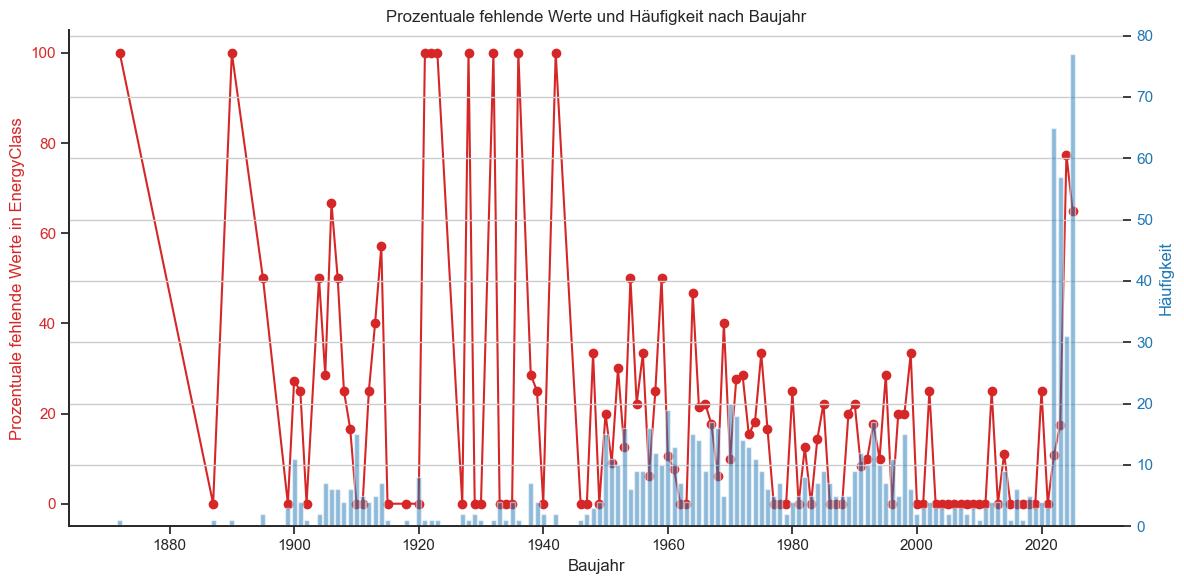

In [31]:
# Berechnung des prozentualen Anteils der fehlenden Werte pro Baujahr
missing_constructionYear = df.groupby('constructionYear')['energyClass'].apply(lambda x: x.isna().mean() * 100)

# Berechnung der Gesamtanzahl der Einträge pro Baujahr
count_constructionYear = df['constructionYear'].value_counts().sort_index()

# Visualisierung der Daten
fig, ax1 = plt.subplots(figsize=(12, 6))

# Erste Y-Achse für den prozentualen Anteil der fehlenden Werte
color = 'tab:red'
ax1.set_xlabel('Baujahr')
ax1.set_ylabel('Prozentuale fehlende Werte in EnergyClass', color=color)
ax1.plot(missing_constructionYear.index, missing_constructionYear.values, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Zweite Y-Achse für die Gesamtanzahl der Einträge pro Baujahr
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Häufigkeit', color=color)
ax2.bar(count_constructionYear.index, count_constructionYear.values, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Prozentuale fehlende Werte und Häufigkeit nach Baujahr')
plt.grid(True)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Die primäre Zielsetzung unserer logistischen Regression besteht darin, zu evaluieren, ob auf Basis des Alters eines Gebäudes die Energieeffizienzklasse (energyClass bzw. energyEfficiency) vorhergesagt werden kann. Hierbei dient die Energieeffizienzklasse als abhängige Variable und das Baujahr fachlich als eine wesentliche unabhängige Variable. Um potenziell irreführende Beziehungen zwischen dem Baujahr und der Energieeffizienzklasse zu vermeiden, wird eine Imputation fehlender energyClass-Daten auf Basis des Baujahres bewusst unterlassen, um Verzerrungen in der Analyse zu verhindern. Die Auswertung des oben aufgeführten Diagrammes hat gezeigt, dass das Fehlen der energyClass-Daten nicht systematisch mit dem Baujahr eines Objektes korreliert, weshalb diese als zufällig fehlend betrachtet werden können.
Objekte ohne Angabe zu Energieeffizienzklasse werden somit aus dem DataFrame entfernt.

In [32]:
df = df.dropna(subset=['energyClass'])

Für die statischen Analysen wird die textbasierte Variable 'energyClass' in numerische Werte umgewandelt.

In [33]:
energyClasses = {
    "DE_ENV2014_CLASS_A_PLUS": 1,
    "DE_ENV2014_CLASS_A": 2,
    "DE_ENV2014_CLASS_B": 3,
    "DE_ENV2014_CLASS_C": 4,
    "DE_ENV2014_CLASS_D": 5,
    "DE_ENV2014_CLASS_E": 6,
    "DE_ENV2014_CLASS_F": 7,
    "DE_ENV2014_CLASS_G": 8,
    "DE_ENV2014_CLASS_H": 9
}
df["energyClass"].replace(energyClasses, inplace=True)

#### Erstellung abhängige Variable 'energyEfficiency'

Eine zweite abhängige Variable für die logistische Regression wird erstellt, indem die Energieeffizienzklassen in zwei Kategorien unterteilt werden (Energieeffizient und Nicht-Energieeffizient).

Die Klassen "DE_ENV2014_CLASS_A_PLUS", "DE_ENV2014_CLASS_A" und "DE_ENV2014_CLASS_B" werden als "Energieeffizient" (1) kategorisiert, während die Klassen "DE_ENV2014_CLASS_C" bis "DE_ENV2014_CLASS_H" als "Nicht-Energieeffizient" (0) kategorisiert werden.

In [34]:
# Zuordnen zu den Kategorien
def categorizeEnergyEfficiency(energyClass):
    if pd.isna(energyClass):
        return np.nan  # NaN beibehalten
    elif energyClass in [1, 2, 3]:
        return 1  # Energieeffizient
    else:
        return 0  # Nicht-Energieeffizient

# Erstellung abhängige Variable
df['energyEfficiency'] = df['energyClass'].apply(categorizeEnergyEfficiency)

Jeder Wert in "energy" wird durch einen numerischen Wert ersetzt. Die Umwandlung dieser kategorischen Variablen in numerische Werte ist für die statistische Analyse erforderlich. Fehlende Werte werden entfernt.

In [35]:
# Häufigkeit
df['energy'].value_counts()

Gas                              348
Fernwärme                        126
Öl                                60
Elektro                           18
Solar                             10
Elektro, Gas                       9
Pellets                            9
Gas, Solar                         9
Blockheizkraftwerk                 7
Fernwärme, Gas                     6
Fernwärme, Öl                      2
Fernwärme, Gas, Solar              2
Elektro, Fernwärme                 1
Fernwärme, Kohle                   1
Gas, Pellets                       1
Fernwärme, Solar                   1
Gas, Öl                            1
Fernwärme, Holz                    1
Blockheizkraftwerk, Fernwärme      1
Blockheizkraftwerk, Gas            1
Gas, Holz                          1
Name: energy, dtype: int64

In [36]:
sources = {
    'Gas': 1,
    'Fernwärme': 2,
    'Öl': 3,
    'Elektro': 4,
    'Solar': 5,
    'Pellets': 6,
    'Elektro, Gas': 7,
    'Gas, Solar': 8,
    'Blockheizkraftwerk': 9,
    'Fernwärme, Gas': 10,
    'Gas, Holz': 11,
    'Fernwärme, Öl': 12,
    'Fernwärme, Gas, Solar': 13,
    'Gas, Pellets': 14,
    'Gas, Öl': 15,
    'Blockheizkraftwerk, Fernwärme': 16,
    'Gas, Holz, Kohle': 17,
    'Fernwärme, Holz': 18,
    'Fernwärme, Kohle': 19,
    'Elektro, Pellets': 20,
    'Fernwärme, Solar': 21,
    'Elektro, Fernwärme': 22,
}

# Die Spalte "energy" mit den manuell vergebenen numerischen Werten ersetzen
df['energySources'] = df['energy'].map(sources)

Objekte ohne energySources werden entfernt. Analyse der Auswirkungen noch offen!!!!!!

In [37]:
df = df.dropna(subset=['energySources'])

## Ausreißer

In [38]:
# summary statistics for all numerical columns (in transposed view)
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
constructionYear,614.0,1975.25,33.25,1887.00,1957.25,1974.00,1998.00,2.025000e+03
livingSpace,614.0,75.80,36.29,19.56,55.00,71.26,88.38,5.320000e+02
Tealium.object_locationid,614.0,493483.58,45.32,493383.00,493434.00,493492.00,493526.25,4.935600e+05
Tealium.object_zip,614.0,90448.93,25.96,90402.00,90429.00,90445.50,90473.00,9.049100e+04
photosCount,614.0,13.24,8.86,1.00,7.00,11.00,16.00,5.400000e+01
localAmenitiesScore,614.0,6.75,1.60,1.00,5.90,7.10,8.00,9.300000e+00
localMobilityScore,614.0,9.25,0.74,5.40,9.20,9.60,9.70,9.700000e+00
EstateAddress.ZipCode,614.0,90448.93,25.96,90402.00,90429.00,90445.50,90473.00,9.049100e+04
Offerer.globalUserId,614.0,1783920.87,2756903.70,10601.00,37422.00,65803.50,2508530.25,9.310721e+06
Project.Address.PostCode,57.0,90443.84,19.64,90427.00,90443.00,90443.00,90443.00,9.054200e+04


Es fällt auf, dass in der Spalte "price" voraussichtlich mindestens ein Ausreißer vorhanden ist, da der Preis einer Immobilie bei 100 Millionen Euro liegt, während der Medianpreis bei 295.000 Euro liegt. Um Ausreißer zu identifizieren, wenden wir den Z-Score an.

In [39]:
# Berechne den Z-Score
z_scores = stats.zscore(df['price'])
threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,Personenaufzug,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
781,2021.0,264.0,493413,True,90431,EUR,PENTHOUSE,standard,14.0,8.3,9.2,COMMISSION_FREE,Nürnberg,90431,Augsburger Straße,5BA347D760714CCC97F0F7D38252A296,678606,ohne-makler.net - Immobilien selbst vermarkten,NaN,NaN,NaN,49.45666,11.02897,Eberhardshof,100000000.0,3.0,450.0,UNDEFINED,2,50.0,Penthouse,NaN,NaN,NaN,NaN,Fernwärme,NaN,NaN,1,neuwertig,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,2.0


Der hohe Preis dieser Immobilie wird fachlich nicht durch die übrigen Merkmale unterstützt. Daher wird die Immobilie aus dem Datensatz entfernt.

In [40]:
df = df[df['price'] != 100000000]

Da der Preis stark von der Größe der Wohnung abhängt, berechnen wir den Z-Score für den Quadratmeterpreis, um mögliche weitere Ausreißer zu identifizieren. (Es ist zu beachten, dass bereits ein Ausreißer entfernt wurde, was die weitere Identifizierung von Ausreißern beeinflusst.)

In [41]:
# Berechne den Z-Score für Quadratmeterpreis
z_scores = stats.zscore(df['price'] / df['livingSpace'])

threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,Personenaufzug,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
865,2023.0,143.98,493440,True,90425,EUR,PENTHOUSE,standard,9.0,4.1,9.1,COMMISSION_REQUIRED,Nürnberg,90425,Großreuther Straße 165,E84DBA8E79EB435A9108F9D84B79D8C3,7486516,mayrkonzepte,NaN,NaN,NaN,49.47379,11.08631,Großreuth h d Veste,1320000.0,4.0,370.0,UNDEFINED,1,17.5,Penthouse,NaN,NaN,NaN,Neubau,Elektro,NaN,"Fußbodenheizung, Zentralheizung",1,NaN,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,4.0
921,2023.0,20.00,493529,False,90419,EUR,wohnung,standard,4.0,8.4,9.6,COMMISSION_DEFAULT,Nürnberg,90419,NaN,B4B229949063447B9ED8D767961310BB,8754459,Eisenstein Immobilien GmbH,NaN,NaN,NaN,49.46145,11.06072,St Johannis,178000.0,1.0,NaN,UNDEFINED,2,45.2,NaN,NaN,NaN,NaN,NaN,"Fernwärme, Gas",NaN,NaN,1,neuwertig,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,10.0


Die anderen identifizierten Ausreißer sind aus fachlicher Sicht nicht als Ausreißer zu betrachten. Daher werden sie in der weiteren Analyse beibehalten.

Auf Basis der IQR-Methode suchen wir nach weiteren Ausreißern.

In [42]:
q1 = (df['price'] / df['livingSpace']).quantile(0.25)
q3 = (df['price'] / df['livingSpace']).quantile(0.75)
iqr = q3 - q1
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

outliers = df[(df['price'] / df['livingSpace'] < lowerBound) | (df['price'] / df['livingSpace'] > upperBound)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,Personenaufzug,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
312,2016.0,106.00,493383,False,90431,EUR,PENTHOUSE,standard,6.0,3.2,8.9,COMMISSION_DEFAULT,Nürnberg,90431,NaN,57A44313CE104B41BCCACAC3040E5AD2,44588,IAD Immobilien Agentur Deutschland GmbH,NaN,NaN,NaN,49.44363,11.01332,Kleinreuth b Schweinau,799000.0,3.0,NaN,UNDEFINED,3,66.0,Penthouse,NaN,NaN,NaN,NaN,Fernwärme,NaN,Fußbodenheizung,1,neuwertig,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2.0
585,2018.0,45.00,493452,False,90455,EUR,MAISONETTE,standard,5.0,3.4,7.6,COMMISSION_DEFAULT,Nürnberg,90455,NaN,aa0896f702d844b99d1a78da605691a2,68692,WMG Lifestyle &a; Marketing GmbH Bereich IMMOB...,NaN,NaN,NaN,49.34839,11.06059,Katzwang,339000.0,2.0,181.0,UNDEFINED,1,29.0,Maisonette,NaN,NaN,NaN,NaN,Gas,NaN,Zentralheizung,1,neuwertig,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1.0
865,2023.0,143.98,493440,True,90425,EUR,PENTHOUSE,standard,9.0,4.1,9.1,COMMISSION_REQUIRED,Nürnberg,90425,Großreuther Straße 165,E84DBA8E79EB435A9108F9D84B79D8C3,7486516,mayrkonzepte,NaN,NaN,NaN,49.47379,11.08631,Großreuth h d Veste,1320000.0,4.0,370.0,UNDEFINED,1,17.5,Penthouse,NaN,NaN,NaN,Neubau,Elektro,NaN,"Fußbodenheizung, Zentralheizung",1,NaN,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,4.0
921,2023.0,20.00,493529,False,90419,EUR,wohnung,standard,4.0,8.4,9.6,COMMISSION_DEFAULT,Nürnberg,90419,NaN,B4B229949063447B9ED8D767961310BB,8754459,Eisenstein Immobilien GmbH,NaN,NaN,NaN,49.46145,11.06072,St Johannis,178000.0,1.0,NaN,UNDEFINED,2,45.2,NaN,NaN,NaN,NaN,NaN,"Fernwärme, Gas",NaN,NaN,1,neuwertig,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,10.0


Auch diese sind fachlich betrachtet keine Ausreißer.

## Geographische Daten

In [43]:
#pip install haversine

Zudem verwenden wir das Stadtzentrum als Referenzpunkt und ermitteln die Entfernung des Stadtteils, in dem sich die Wohnung befindet, zum Stadtzentrum.

In [44]:
from haversine import haversine

# Referenzpunkt für das Stadtzentrum in Nürnberg
latitudeCenter = 49.4521
longitudeCenter = 11.0767

# Berechnen der Distanzen für jede Immobilie zum Stadtzentrum
df['distanceToCenter'] = df.apply(
    lambda row: haversine((row['latitudeDistrict'], row['longitudeDistrict']), (latitudeCenter, longitudeCenter)),
    axis=1
)

# Weitere Referenzpunkte:
#"Dutzendteich Nürnberg": (49.42475, 11.11246),
#"Luitpoldhain Nürnberg": (49.43449, 11.10604),
#"Stadtpark Nürnberg": (49.464848, 11.092796),
#"Volkspark Marienberg Nürnberg": (49.482826, 11.098938),
#"Wöhrder See Nürnberg": (49.455025, 11.101498)

Basierend auf den geografischen Koordinaten des Stadtteils, in dem sich die Wohnung befindet, und den Koordinaten des Stadtzentrums erfolgt eine Klassifizierung in eines der folgenden geographischen Gebiete:
- Nordöstlich des Zentrums: Wenn Breitengrad > Zentrum Breitengrad und Längengrad > Zentrum Längengrad.
- Nordwestlich des Zentrums: Wenn Breitengrad > Zentrum Breitengrad und Längengrad < Zentrum Längengrad.
- Südöstlich des Zentrums: Wenn Breitengrad < Zentrum Breitengrad und Längengrad > Zentrum Längengrad.
- Südwestlich des Zentrums: Wenn Breitengrad < Zentrum Breitengrad und Längengrad < Zentrum Längengrad.

Klassifikation:
- Nordöstlich des Zentrums: 1
- Nordwestlich des Zentrums: 2
- Südöstlich des Zentrums: 3
- Südwestlich des Zentrums: 4

In [45]:
# Referenzpunkt für das Stadtzentrum in Nürnberg
latitudeCenter = 49.4521
longitudeCenter = 11.0767

def classification(row):
    if row['latitudeDistrict'] > latitudeCenter and row['longitudeDistrict'] > longitudeCenter:
        return 1  # Nordöstlich
    elif row['latitudeDistrict'] > latitudeCenter and row['longitudeDistrict'] < longitudeCenter:
        return 2  # Nordwestlich
    elif row['latitudeDistrict'] < latitudeCenter and row['longitudeDistrict'] > longitudeCenter:
        return 3  # Südöstlich
    elif row['latitudeDistrict'] < latitudeCenter and row['longitudeDistrict'] < longitudeCenter:
        return 4  # Südwestlich
    else:
        return 0  # Direkt im Zentrum oder auf der Grenzlinie

# Anwenden der Funktion auf jede Zeile
df['location'] = df.apply(classification, axis=1)

In [46]:
 df['location'].value_counts()

4    235
1    154
3    143
2     81
Name: location, dtype: int64

In [47]:
# Erstellen von Dummy-Variablen aus der 'location'-Spalte
dummies = pd.get_dummies(df['location'])

# Umbenennen der Dummy-Variablen
dummies.columns = ['Northeast', 'Northwest', 'Southeast', 'Southwest']

# Hinzufügen zum Dataframe
df = pd.concat([df, dummies], axis=1)

### Erstellung des bereinigten Dataframes

In diesem Abschnitt werden relevante Spalten für die weitere Analyse selektiert und umbenannt. 

Im Anschluss wird das bereinigte DataFrame als csv-Datei gespeichert. Dieses ist Ausgangspunkt für die weitere Analyse.

In [48]:
# Liste der ausgewählten Spalten für die weitere Analyse
selectedColumns = ['location', 'Northeast','Northwest', 'Southeast', 'Southwest', 'energyEfficiency', 'price', 'constructionYear', 'livingSpace', 'energySources', 'photosCount', 'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict', 'distanceToCenter', 'district', 'rooms', 'energyClass', 'elevator', 'sauna', 'swimmingpool', 'kitchen', 'Kelleranteil', 'abstellraum', 'rollstuhlgerecht', 'BETREUTES_WOHNEN', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace', 'chimney', 'attics']

# DataFrame mit den ausgewählten Spalten für die weitere Analyse
new_df = df[selectedColumns].copy()

# Spaltennamen ändern
new_df_names = {
    'kitchen': 'kitchenEqipped',
    'Kelleranteil': 'cellar',
    'abstellraum': 'storageRoom',
    'rollstuhlgerecht': 'wheelchairAccessible',
    'BETREUTES_WOHNEN': 'assistedLiving',
}

# Die Spaltennamen im DataFrame ändern
new_df.rename(columns=new_df_names, inplace=True)

In [49]:
# Funktioniert nicht

filePath = r'https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/immobilienNuernberg_cleaned.csv'

new_df.to_csv(filePath, index=False, mode='w')  

In [50]:
filePath = r'C:\Users\papad\Documents\GitHub\project\data\external\immobilienNuernberg_cleaned.csv'

new_df.to_csv(filePath, index=False, mode='w')

OSError: Cannot save file into a non-existent directory: 'C:\Users\papad\Documents\GitHub\project\data\external'

In [51]:
filePath = r'https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/immobilienNuernberg_cleaned.csv'
df = pd.read_csv(filePath)

In [52]:
df.columns

Index(['location', 'Northeast', 'Northwest', 'Southeast', 'Southwest',
       'energyEfficiency', 'price', 'constructionYear', 'livingSpace',
       'energySources', 'photosCount', 'localAmenitiesScore',
       'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict',
       'distanceToCenter', 'district', 'rooms', 'energyClass', 'elevator',
       'sauna', 'swimmingpool', 'kitchenEqipped', 'cellar', 'storageRoom',
       'wheelchairAccessible', 'assistedLiving', 'parkingSlots', 'guestToilet',
       'privateOutdoorSpace', 'chimney', 'attics'],
      dtype='object')

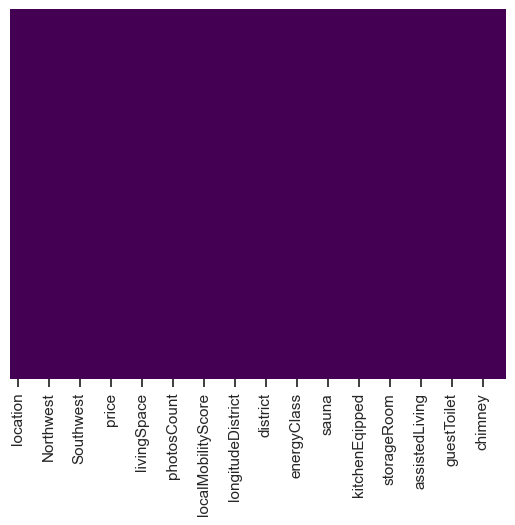

In [53]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [54]:
# Nummerische Variablen
df['constructionYear'] = df['constructionYear'].astype(int)
df['livingSpace'] = df['livingSpace'].astype(float)
df['photosCount'] = df['photosCount'].astype(int)
df['localAmenitiesScore'] = df['localAmenitiesScore'].astype(float)
df['localMobilityScore'] = df['localMobilityScore'].astype(float)
df['latitudeDistrict'] = df['latitudeDistrict'].astype(float)
df['longitudeDistrict'] = df['longitudeDistrict'].astype(float)
df['distanceToCenter'] = df['distanceToCenter'].astype(float)
df['price'] = df['price'].astype(float)
df['rooms'] = df['rooms'].astype(float)

# Kategorische Variablen
df['district'] = df['district'].astype('category')
df['location'] = df['location'].astype('category')
df['energyClass'] = df['energyClass'].astype('category')
df['energySources'] = df['energySources'].astype('category')

# Binäre Variablen
binaryColumns = ['elevator', 'sauna', 'swimmingpool', 'kitchenEqipped', 
                  'cellar', 'storageRoom', 'wheelchairAccessible', 'assistedLiving', 
                  'parkingSlots', 'guestToilet', 'privateOutdoorSpace', 
                  'chimney', 'attics', 'energyEfficiency', 
                  'Northeast', 'Northwest', 'Southeast', 'Southwest']

for col in binaryColumns:
    df[col] = df[col].astype('category')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   location              613 non-null    category
 1   Northeast             613 non-null    category
 2   Northwest             613 non-null    category
 3   Southeast             613 non-null    category
 4   Southwest             613 non-null    category
 5   energyEfficiency      613 non-null    category
 6   price                 613 non-null    float64 
 7   constructionYear      613 non-null    int32   
 8   livingSpace           613 non-null    float64 
 9   energySources         613 non-null    category
 10  photosCount           613 non-null    int32   
 11  localAmenitiesScore   613 non-null    float64 
 12  localMobilityScore    613 non-null    float64 
 13  latitudeDistrict      613 non-null    float64 
 14  longitudeDistrict     613 non-null    float64 
 15  distan

### Variablenverzeichnis

| Variable             | Beschreibung                                 | Role       | Type    | Format   |
|----------------------|----------------------------------------------|------------|---------|----------|
| constructionYear     | Baujahr des Objekts                          | Response   | Numeric | int      |
| livingSpace          | Wohnfläche in Quadratmetern                  | Response   | Numeric | float    |
| photosCount          | Anzahl der Fotos in der Anzeige              | Response   | Numeric | int      |
| localAmenitiesScore  | Bewertung der örtlichen Annehmlichkeiten     | Response   | Numeric | float    |
| localMobilityScore   | Bewertung der örtlichen Mobilität            | Response   | Numeric | float    |
| latitudeDistrict     | Breitengrad des Stadtteils                   | Response   | Numeric | float    |
| longitudeDistrict    | Längengrad des Stadtteils                    | Response   | Numeric | float    |
| distanceToCenter​    | Distanz zum Zentrum                          | Response   | Numeric | float    |
| district             | Stadtteil des Objekts                        | Response   | Nominal | category |
| location             | Lage im Verhältnis zum Stadtzentrum| Response   | Nominal | category |
| price                | Preis des Objekts                            | Predictor  | Numeric | float    |
| rooms                | Anzahl der Zimmer im Objekt                  | Response   | Numeric | int      |
| energyClass          | Energieeffizienzklasse des Objekts           | Response   | Ordinal | category |
| energySources        | Energieträger des Objekts                    | Response   | Nominal | category |
| energyEfficiency     | Energieeffizienzklasse (binär)               | Predictor  | Ordinal | category |
| elevator             | Vorhandensein eines Aufzugs im Gebäude       | Response   | Nominal | category |
| sauna                | Vorhandensein einer Sauna im Gebäude         | Response   | Nominal | category |
| swimmingpool         | Vorhandensein eines Swimmingpools im Gebäude | Response   | Nominal | category |
| kitchenEqipped       | Vorhandensein einer ausgestatteten Küche     | Response   | Nominal | category |
| cellar               | Vorhandensein eines Kellers im Gebäude       | Response   | Nominal | category |
| storageRoom          | Vorhandensein eines Abstellraums im Gebäude  | Response   | Nominal | category |
| wheelchairAccessible | Barrierefreiheit des Gebäudes                | Response   | Nominal | category |
| assistedLiving       | Betreutes Wohnen im Gebäude                  | Response   | Nominal | category |
| parkingSlots         | Vorhandensein eines Parkplätze               | Response   | Nominal | category |
| guestToilet          | Vorhandensein eines Gäste-WCs im Gebäude     | Response   | Nominal | category |
| privateOutdoorSpace  | Vorhandensein eines privaten Außenbereichs   | Response   | Nominal | category |
| chimney              | Vorhandensein eines Kamins                   | Response   | Nominal | category |
| attics               | Wohnung befindet sich im Dachgeschoss        | Response   | Nominal | category |

### Datenpartitionierung

Wir führen eine stratifizierte Aufteilung auf Basis der Spalte 'energyClass' durch. Damit wird sichergestellt, dass wir Objekte von allen Energieeffizienzklassen in unseren Datensets haben.

In [81]:
# Modell 1: 'price' als abhängige Variable
X_price = df.drop('price', axis=1)
y_price = df['price']

# Modell 2: 'energyEfficiency' als abhängige Variable
X_energy = df.drop('energyEfficiency', axis=1)
y_energy = df['energyEfficiency']

# Aufteilen & Scaling der Daten für das Modell mit 'price' als abhängige Variable
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
    X_price, y_price, test_size=0.2, random_state=42, stratify=df['energyClass'])

df_train_price = pd.concat([X_train_price, y_train_price], axis=1)
df_test_price = pd.concat([X_test_price, y_test_price], axis=1)


# Aufteilen & Scaling der Daten für das Modell mit 'energyEfficiency' als abhängige Variable
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X_energy, y_energy, test_size=0.2, random_state=42, stratify=df['energyClass'])

df_train_energy = pd.concat([X_train_energy, y_train_energy], axis=1)
df_test_energy = pd.concat([X_test_energy, y_test_energy], axis=1)


print("X_train_price:", X_train_price.shape)
print("X_test_price:", X_test_price.shape)
print("X_train_energy:", X_train_energy.shape)
print("X_test_energy:", X_test_energy.shape)

X_train_price: (490, 31)
X_test_price: (123, 31)
X_train_energy: (490, 31)
X_test_energy: (123, 31)


## Analysis

### Deskriptive Statistiken

In [57]:
# Deskriptive Statistiken für numerische Variablen
df_train_price.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
constructionYear,490.0,1974.70,33.09,1887.00,1958.00,1973.00,1998.00,2025.00
livingSpace,490.0,75.92,36.94,20.00,55.00,70.87,87.95,532.00
photosCount,490.0,13.17,8.83,1.00,7.00,11.00,16.00,54.00
localAmenitiesScore,490.0,6.70,1.60,1.20,5.80,7.00,8.00,9.30
localMobilityScore,490.0,9.22,0.76,5.40,9.10,9.60,9.70,9.70
latitudeDistrict,490.0,49.44,0.02,49.35,49.43,49.45,49.46,49.52
longitudeDistrict,490.0,11.08,0.03,11.01,11.05,11.08,11.10,11.19
distanceToCenter,490.0,3.21,2.11,0.23,1.67,2.51,4.04,11.59
rooms,490.0,2.77,1.36,1.00,2.00,3.00,3.00,22.00
price,490.0,318037.74,184341.92,88000.00,197625.00,274500.00,395000.00,1770000.00


- **Baujahr (constructionYear)**
  - Bereich: 1887 bis 2025
  - Durchschnitt: ~1975
  - Interpretation: Vielfältige Mischung von Bestands- bis zu projektierte Neubauimmobilien

- **Wohnfläche (livingSpace)**
  - Bereich: 20 m² bis 532 m²
  - Durchschnitt: ~75,92 m²
  - Interpretation: Breite Palette an Wohnungsgrößen

- **Anzahl der Fotos (photosCount)**
  - Bereich: 1 bis 54 Fotos pro Anzeige
  - Durchschnitt: ~13 Fotos

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Bereich: 1,2 bis 9,3
  - Durchschnitt: ~6,7
  - Interpretation: Allgemein gute Qualität der lokalen Annehmlichkeiten

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Bereich: 5,4 bis 9,7
  - Durchschnitt: ~9,22
  - Interpretation: Gute Verkehrsanbindung in den meisten Gebieten

- **Distanz zum Zentrum (distanceToCenter)**
  - Bereich: von 0,23 bis 11,59 km
  - Durchschnitt: ~3,21 km
  - Interpretation: Die Spannweite der Entfernungen deutet auf vielfältige Lagen hin
  
- **Zimmeranzahl (rooms)**
  - Bereich: 1 bis 22 Zimmer
  - Durchschnitt: ~2,77 Zimmer
  - Interpretation: Vielfalt an Raumangeboten
  
 - **Preis (price)**
   - Bereich: 88.000 € bis 1.770.000 €
   - Interpretation: Große Bandbreite an Immobilientypen

### Exploratory Data Analysis

#### Visuelle Analysen der nummerischen Variablen

##### - Histogramme: 
###### Um Verteilungen der nummerischen Variablen zu forschen

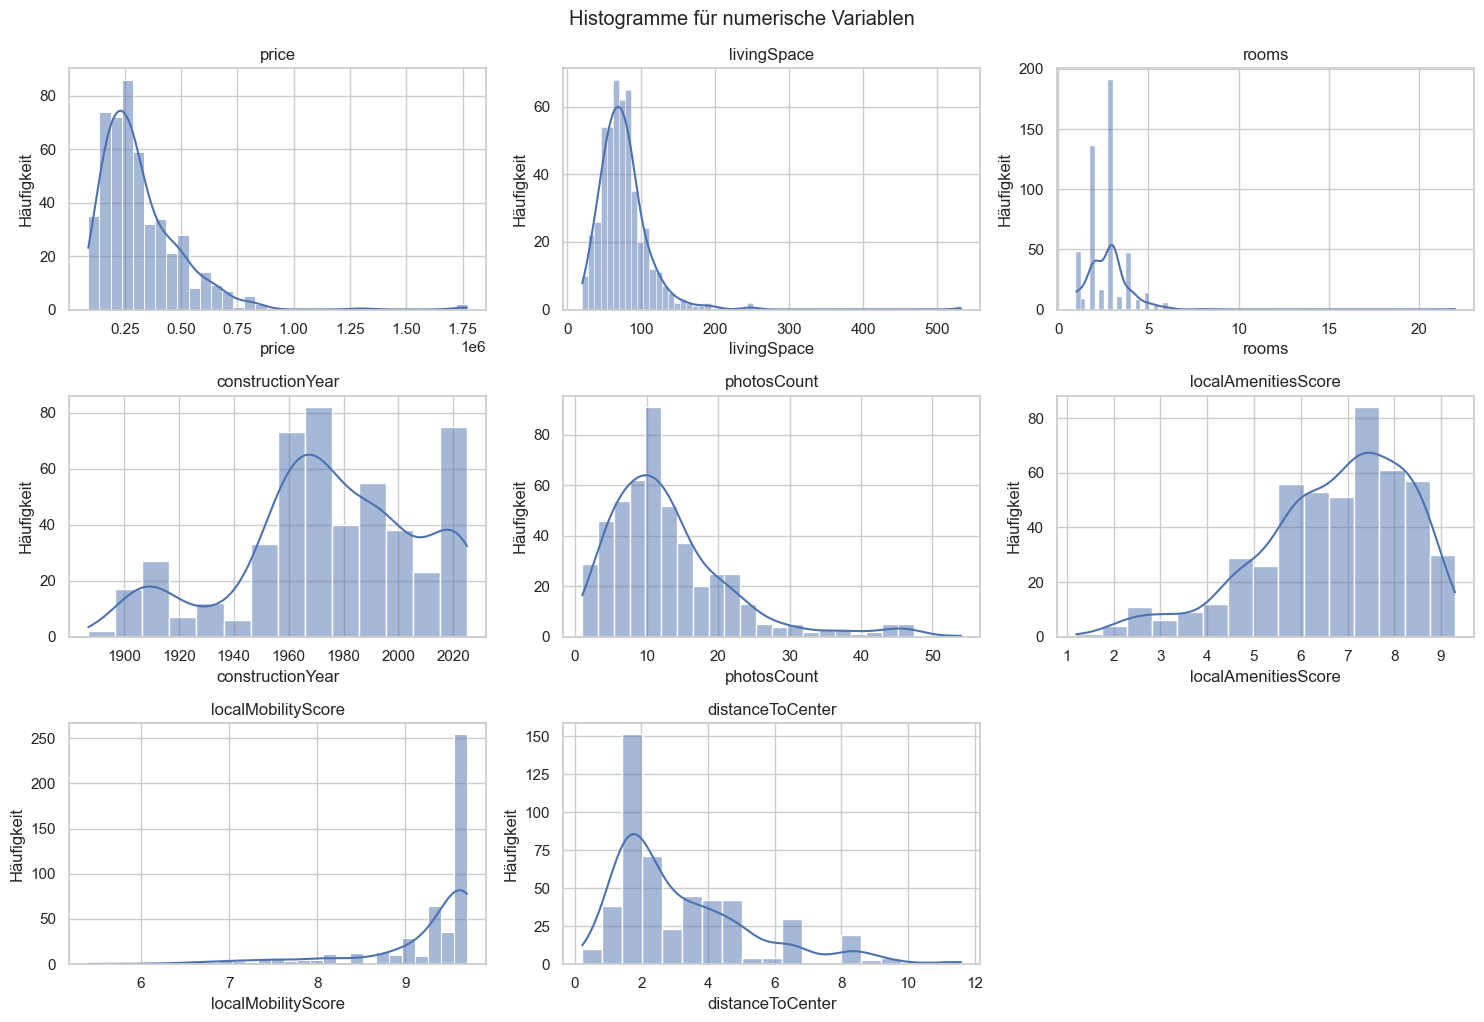

In [58]:
sns.set(style="whitegrid")

# Variablen für die Darstellung
variables = ['price', 'livingSpace', 'rooms', 'constructionYear', 'photosCount', 'localAmenitiesScore', 'localMobilityScore', 'distanceToCenter'
##             , 'latitudeDistrict', 'longitudeDistrict' -- vllt ferner als Enternung zum Stadtzentrum abbilden
             ]

# Histogramme X_train_energy (Äquivalent für X_train_price)
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train_energy[var], kde=True)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.suptitle("Histogramme für numerische Variablen", y=1.02)
plt.show()


Die Histogramme bieten einen Einblick in die Verteilungen der ausgewählten Variablen:

- **Preis (price)**
  - Verteilung: Rechtsschief
  - Beobachtung: Konzentration an niedrigeren Preisen; einige Immobilien mit sehr hohen Preisen

- **Wohnfläche (livingSpace)**
  - Verteilung: Rechtsschief
  - Beobachtung: Meistens kleinere bis mittlere Wohnflächen

- **Zimmeranzahl (rooms)**
  - Verteilung: Rechtsschief und diskret
  - Beobachtung: Überwiegend niedrig bis mittel (1 bis 4 Zimmer)

- **Baujahr (constructionYear)**
  - Verteilung: Spitzen in bestimmten Perioden (trimodal)
  - Beobachtung: Mögliche Reflexion historischer Bauwellen

- **Anzahl der Fotos (photosCount)**
  - Verteilung: Rechtsschief und diskret
  - Beobachtung: Meistens gering bis mittel

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Verteilung: Relativ gleichmäßig, leichte Tendenz zu höheren Werten
  - Beobachtung: Deutet auf generell gute Qualität lokaler Annehmlichkeiten hin

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Verteilung: Tendenz zu höheren Werten
  - Beobachtung: Hinweis auf gute Verkehrsanbindung in den gelisteten Immobilien
 
- **Entfernung zum Zentrum (distanceToCenter)**
  - Verteilung: Rechtsschief
  - Beobachtung: Höheren Konzentration von Immobilien, die näher am Zentrum liegen

In [59]:
df_train_price['log_price'] = np.log(df_train_price['price'])
#y_train_price['log_price'] = np.log(y_train_price['price'])
df_train_price['log_livingSpace'] = np.log(df_train_price['livingSpace'])
X_train_price['log_livingSpace'] = np.log(X_train_price['livingSpace'])
#X_train_price['log_price'] = np.log(X_train_price['price'])

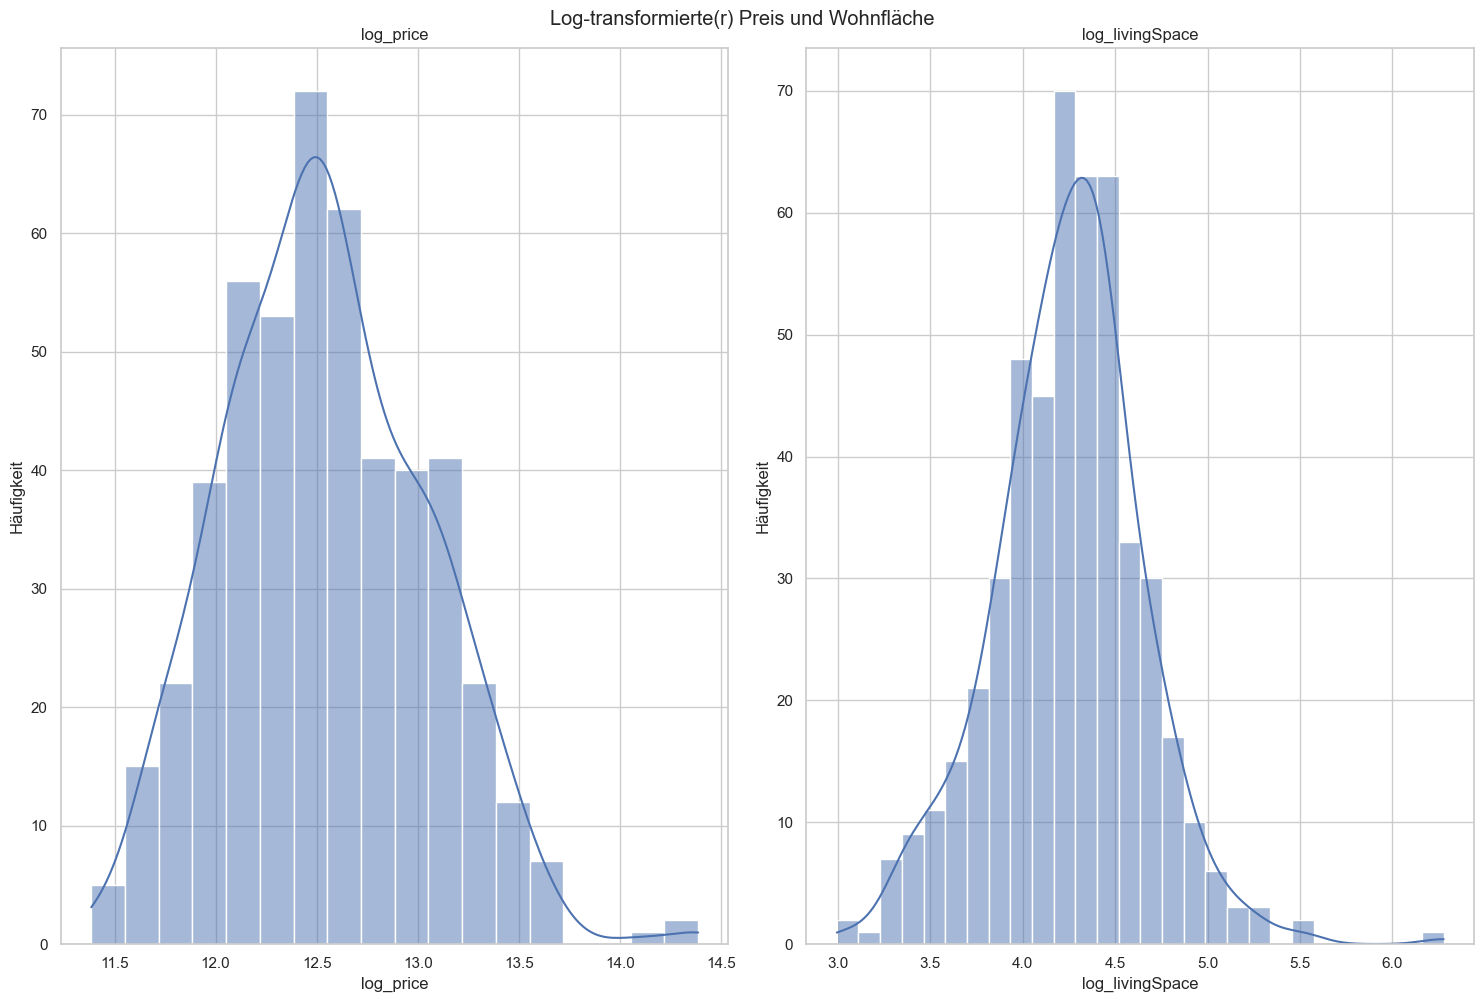

In [60]:
# Die zu plottenden Variablen
variables = ['log_price', 'log_livingSpace']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_train_price[var], kde=True)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.suptitle("Log-transformierte(r) Preis und Wohnfläche", y=1)
plt.show()

Die Histogramme zeigen die Verteilungen der logarithmisch transformierten Variablen 'price' (Preis) und 'livingSpace' (Wohnfläche).

**Log-transformierter Preis:**
- Die Verteilung des log-transformierten Preises ist symmetrischer und ähnelt mehr einer Normalverteilung im Vergleich zur ursprünglichen Verteilung.
- Die Rechtsschiefe der ursprünglichen Preisdistribution wurde reduziert.
- Extreme Werte beeinflusssen weniger die Analyse.

**Log-transformierte Wohnfläche:**
- Auch hier ist die Verteilung der log-transformierten Wohnfläche weniger schief und nähert sich mehr einer Normalverteilung an.
- Extreme Werte beeinflusssen weniger die Analyse.

Die Annahme der Normalverteilung der Daten für die linearen Regression wird durch diese Transformation unterstützt. 

#### - Scatterplots: 
###### Um die Beziehung zwischen nummerischen Variablen und dem Immobilienpreis (price) zu untersuchen.

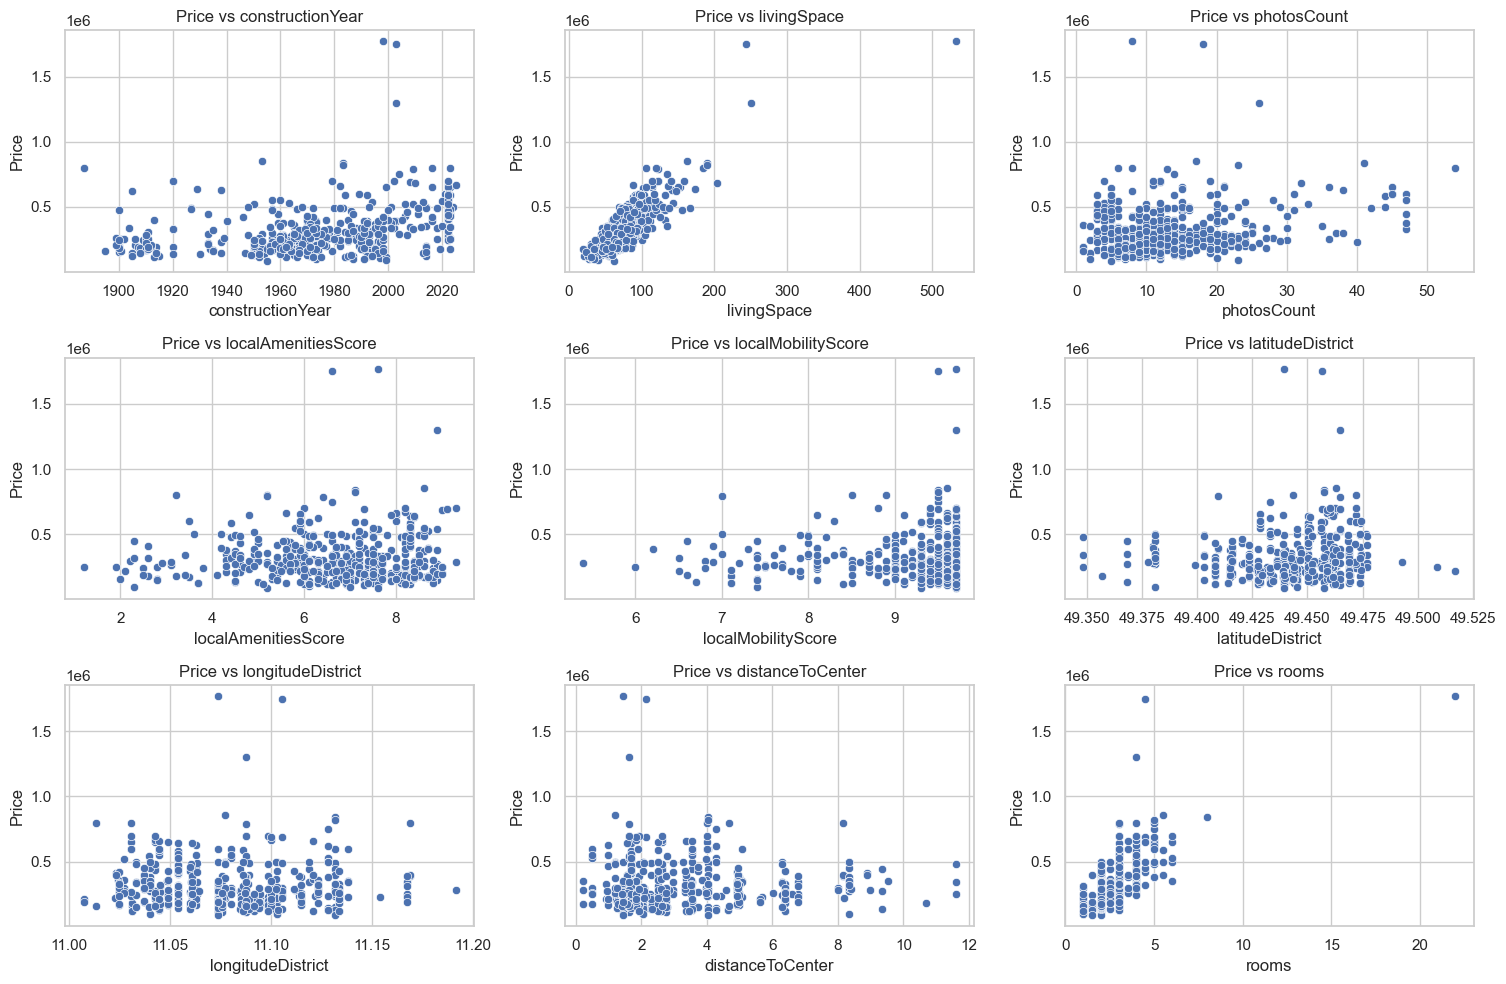

In [61]:
# Streudiagrammen zur Untersuchung der Beziehungen zwischen dem Preis und anderen Variablen
plt.figure(figsize=(15, 10))

variables = df_train_price.select_dtypes(include=['number']).drop(columns=['price', 'log_price', 'log_livingSpace'])

for i, var in enumerate(variables[1:], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_train_price[var], y=df_train_price['price'])
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

- **Wohnfläche (livingSpace)**
  - Beziehung: Positive Korrelation mit dem Preis
  - Beobachtung: Größere Immobilien tendieren dazu, teurer zu sein 
  
  (Achtung: Preis = Preis pro Quadratmeter * Space)

- **Zimmeranzahl (rooms)**
  - Beziehung: Positive Beziehung zum Preis
  - Beobachtung: Einige Ausreißer vorhanden

  (Hier ist wieder der Colinearity Effekt drin, da rooms mit space sehr stark positiv korreliert sind. das heißt, rooms und space sollte man nur eins nehmen)

- **Baujahr (constructionYear)**
  - Beziehung: Nicht eindeutig zum Preis
  - Beobachtung: Sowohl neue als auch alte Immobilien können hohe Preise erzielen

- **Anzahl der Fotos (photosCount)**
  - Beziehung: Keine klare Korrelation mit dem Preis
  - Beobachtung: Möglicherweise mehr mit Marketingstrategien als mit dem Immobilienwert verbunden

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Beziehung: Leichte Tendenz, dass höhere Bewertungen mit höheren Preisen korrelieren
  - Beobachtung: Beziehung ist nicht stark

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Beziehung: Leichte Tendenz zu höheren Preisen bei besseren Mobilitätsbewertungen
  - Beobachtung: Beziehung ist nicht stark
 
- **Geographische Daten (latitudeDistinct, longtitudeDistinct, distanceToCenter)**
  - Die geografische Lage (latitude, longtitude) zeigt keine klare Korrelation mit dem Preis.
  - Die Beziehung zwischen Entfernung zum Zentrum und Preis ist nicht eindeutig.

###### Um die Beziehung zwischen nummerischen Variablen und dem Log-Immobilienpreis (log_price) zu untersuchen.

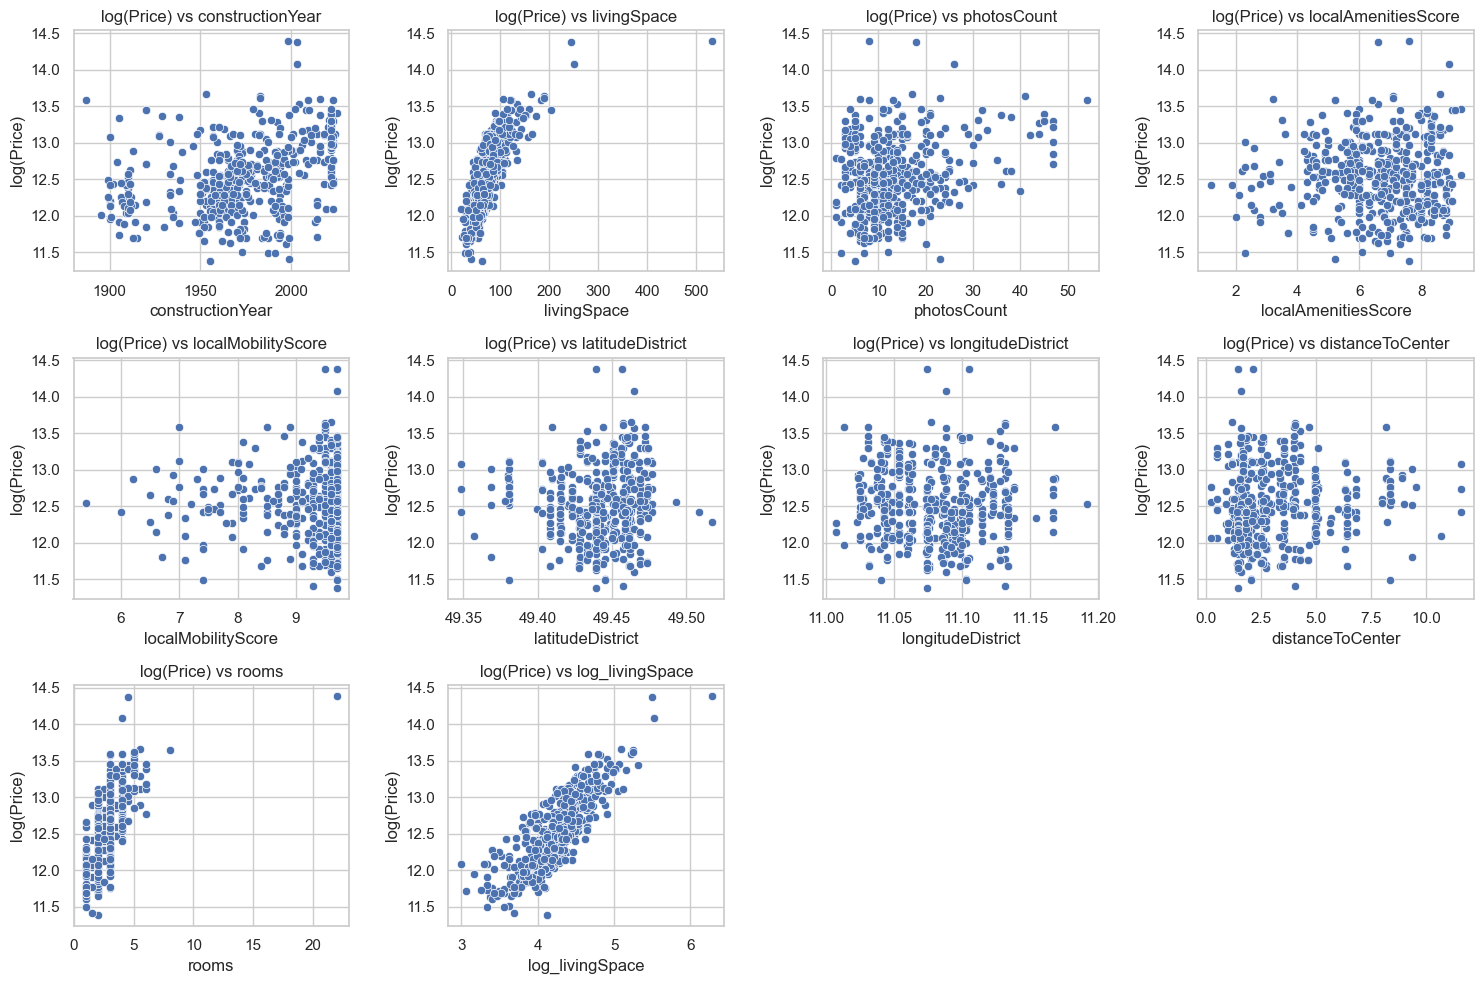

In [62]:
# Streudiagrammen zur Untersuchung der Beziehungen zwischen dem Preis und anderen Variablen
plt.figure(figsize=(15, 10))

variables = df_train_price.select_dtypes(include=['number']).drop(columns=['price', 'log_price'])

for i, var in enumerate(variables[1:], 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=df_train_price[var], y=df_train_price['log_price'])
    plt.title(f'log(Price) vs {var}')
    plt.xlabel(var)
    plt.ylabel('log(Price)')

plt.tight_layout()
plt.show()

Die Streudiagramme mit dem logarithmischen Preis bestätigen im Wesentlichen die Erkenntnisse mit dem nicht-logarithmischen Preis. Es gibt jedoch Hinweise auf mögliche konvexe Beziehungen:

- **Wohnfläche (LivingSpace) vs. log(Preis):** Diese Beziehung zeigt Tendenzen zu einer konvexen Form. Das bedeutet, dass der Preisanstieg bei zunehmender Wohnfläche leicht abflacht. Dies könnte darauf hinweisen, dass größere Wohnflächen zwar teurer sind, jedoch der Preisanstieg pro zusätzlichem Quadratmeter mit zunehmender Größe geringer wird.

- **Anzahl der Zimmer (Rooms) vs. log(Preis):** Auch diese Beziehung könnte leicht konvex sein. Ähnlich zur Wohnfläche könnte der Preis mit steigender Zimmeranzahl ansteigen, jedoch könnte der Anstieg bei einer höheren Zimmeranzahl möglicherweise abflachen.

### Beziehungen zwischen nummerischen Variablen und 'energyEfficiency'

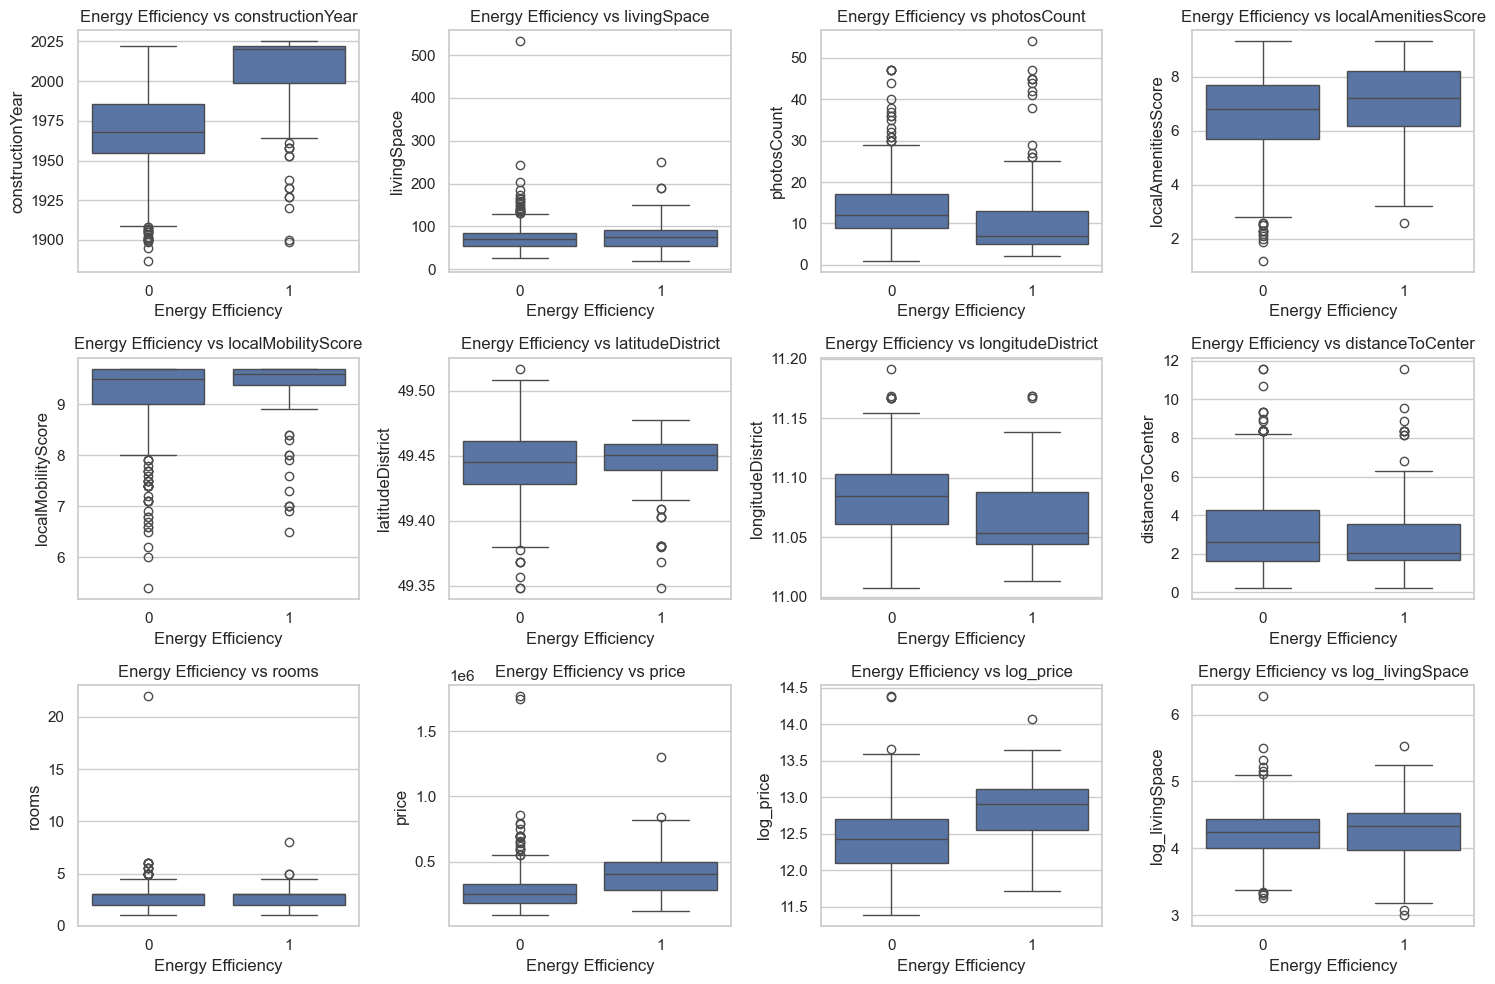

In [63]:
# Beziehungen zwischen nummerischen Variablen und 'energyEfficiency'
plt.figure(figsize=(15, 10))

variables = df_train_price.select_dtypes(include=['number'])

for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_train_price['energyEfficiency'], y=df_train_price[col])
    plt.title(f'Energy Efficiency vs {col}')
    plt.xlabel('Energy Efficiency')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Preis (price und log_price):** Die Preise variieren je nach Energieeffizienzkategorie, wobei höhere Kategorien höhere Preise aufweisen.

**Baujahr (constructionYear):** Neuere Gebäude haben tendenziell höhere Energieeffizienzklassen.

Die anderen Merkmale zeigen keinen erkennbaren Einfluss auf die Energieeffizienz.

##### Analyse der Verteilung von 'energySources' auf 'energyEfficiency'

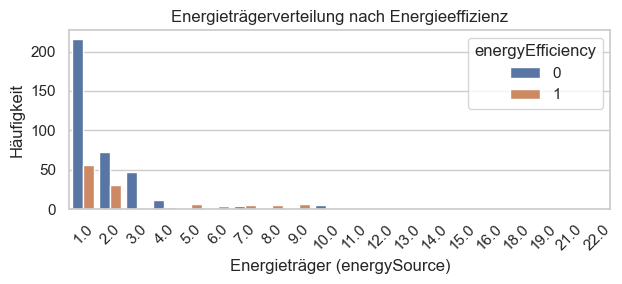

In [64]:
plt.figure(figsize=(12, 3))

# Diagramm für 'energySources'
plt.subplot(1, 2, 1)
sns.countplot(data=X_train_energy, x='energySources', hue=y_train_energy)
plt.title('Energieträgerverteilung nach Energieeffizienz')
plt.xlabel('Energieträger (energySource)')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Zusammenhang zwischen Energieträgern (energySources) und Energieeffizienzklassen**

Die Verteilung der Energieeffizienzklassen variiert in Abhängigkeit von den verwendeten Energieträgern. Dies legt nahe, dass bestimmte Energieträger mit unterschiedlichen Energieeffizienzklassen in Verbindung stehen könnten.

#### Kategoriale Variablen

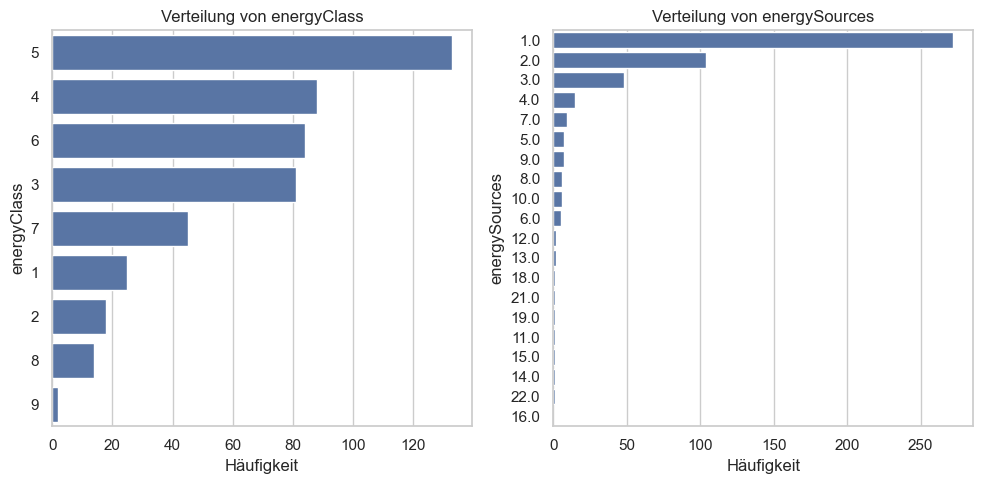

In [65]:
# Verteilung kategorialer Variablen
categoricalVars = ['energyClass', 'energySources']

plt.figure(figsize=(15, 5))

for i, var in enumerate(categoricalVars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=X_train_energy[var], order=X_train_energy[var].value_counts().index)
    plt.title(f'Verteilung von {var}')
    plt.xlabel('Häufigkeit')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Auf den Diagrammen ist zu erkennen, 
1. dass die meisten Immobilenobjekte eine Energy-Klasse von 5 haben.
2. dass über 250 Immobilienobjekte die energySource 1 haben, was anhand der Mappging-Tabelle "Gas" entspricht.

Als nächstes werden wir die Auswirkung der kategorialen Variablen auf den Preis analysieren.  

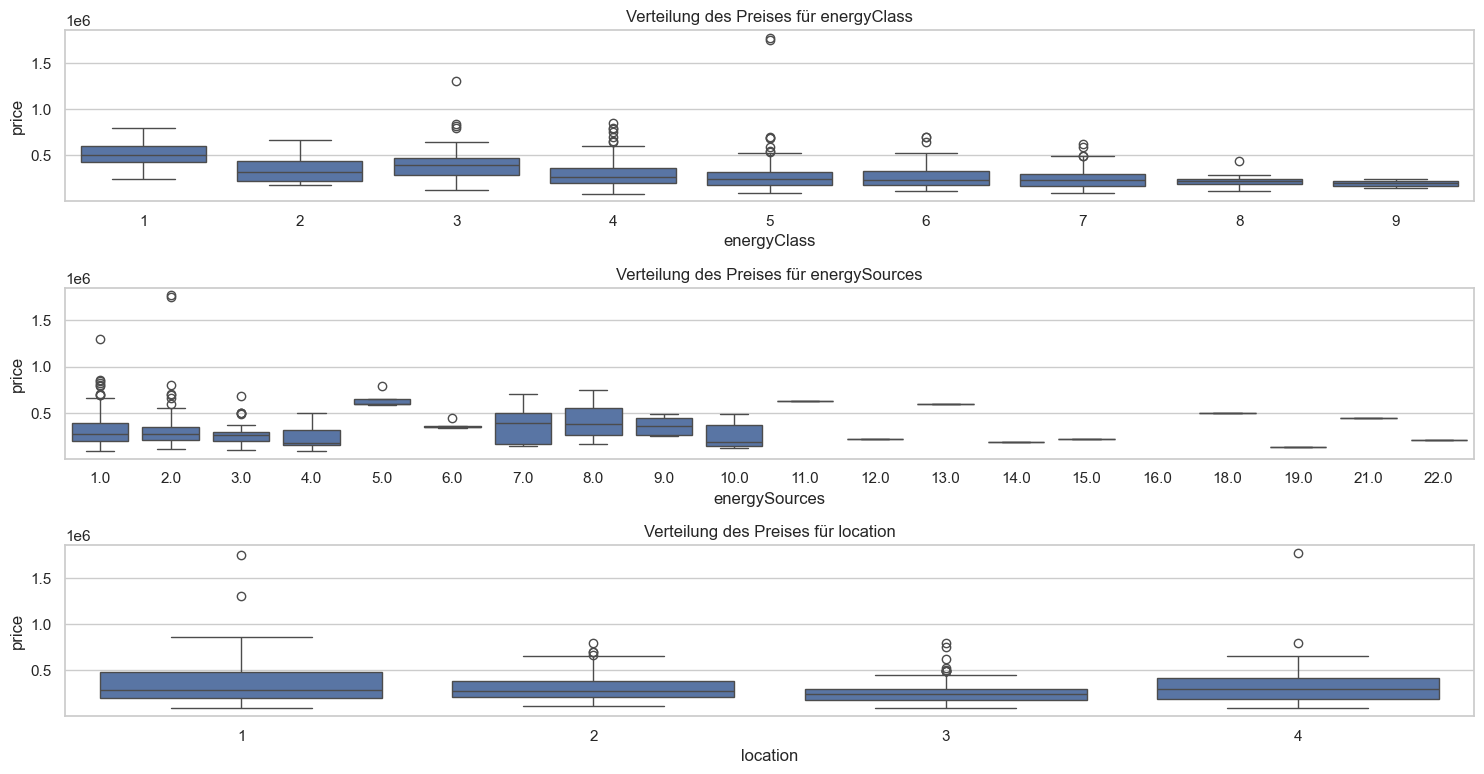

In [66]:
categoricalVars = ['energyClass', 'energySources', 'location']

# Beziehung zwischen kategorialen Variablen und Preis
plt.figure(figsize=(15, 10))

for i, var in enumerate(categoricalVars, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x=var, y='price', data=X_train_energy)
    plt.title(f'Verteilung des Preises für {var}')
    plt.xlabel(var)
    plt.ylabel('price')

plt.tight_layout()
plt.show()

- **Energieklasse (energyClass)**
  - Beobachtung: Unterschiedliche Preisverteilungen zwischen verschiedenen Energieklassen
  - Interpretation: Höhere Medianpreise bei besseren Energieklassen könnten auf höhere Baukosten oder eine höhere Nachfrage hinweisen, was wiederum zu einem höheren Median-Verkaufspreis führt.

- **Energyquellen (energySource)**
  - Die Verteilung des Preises variiert in Abhängigkeit von den verwendeten Energieträgern. Dies legt nahe, dass bestimmte Energieträger mit unterschiedlichen Preisen in Verbindung stehen könnten.
  
- **Standort (location)**
  - Die Standorte weisen unterschiedliche Medianpreise auf, was auf begehrte Gegenden hinweisen könnte.

### Binäre Variablen
#### Einfluss Binärer Variablen auf den Immobilienpreis

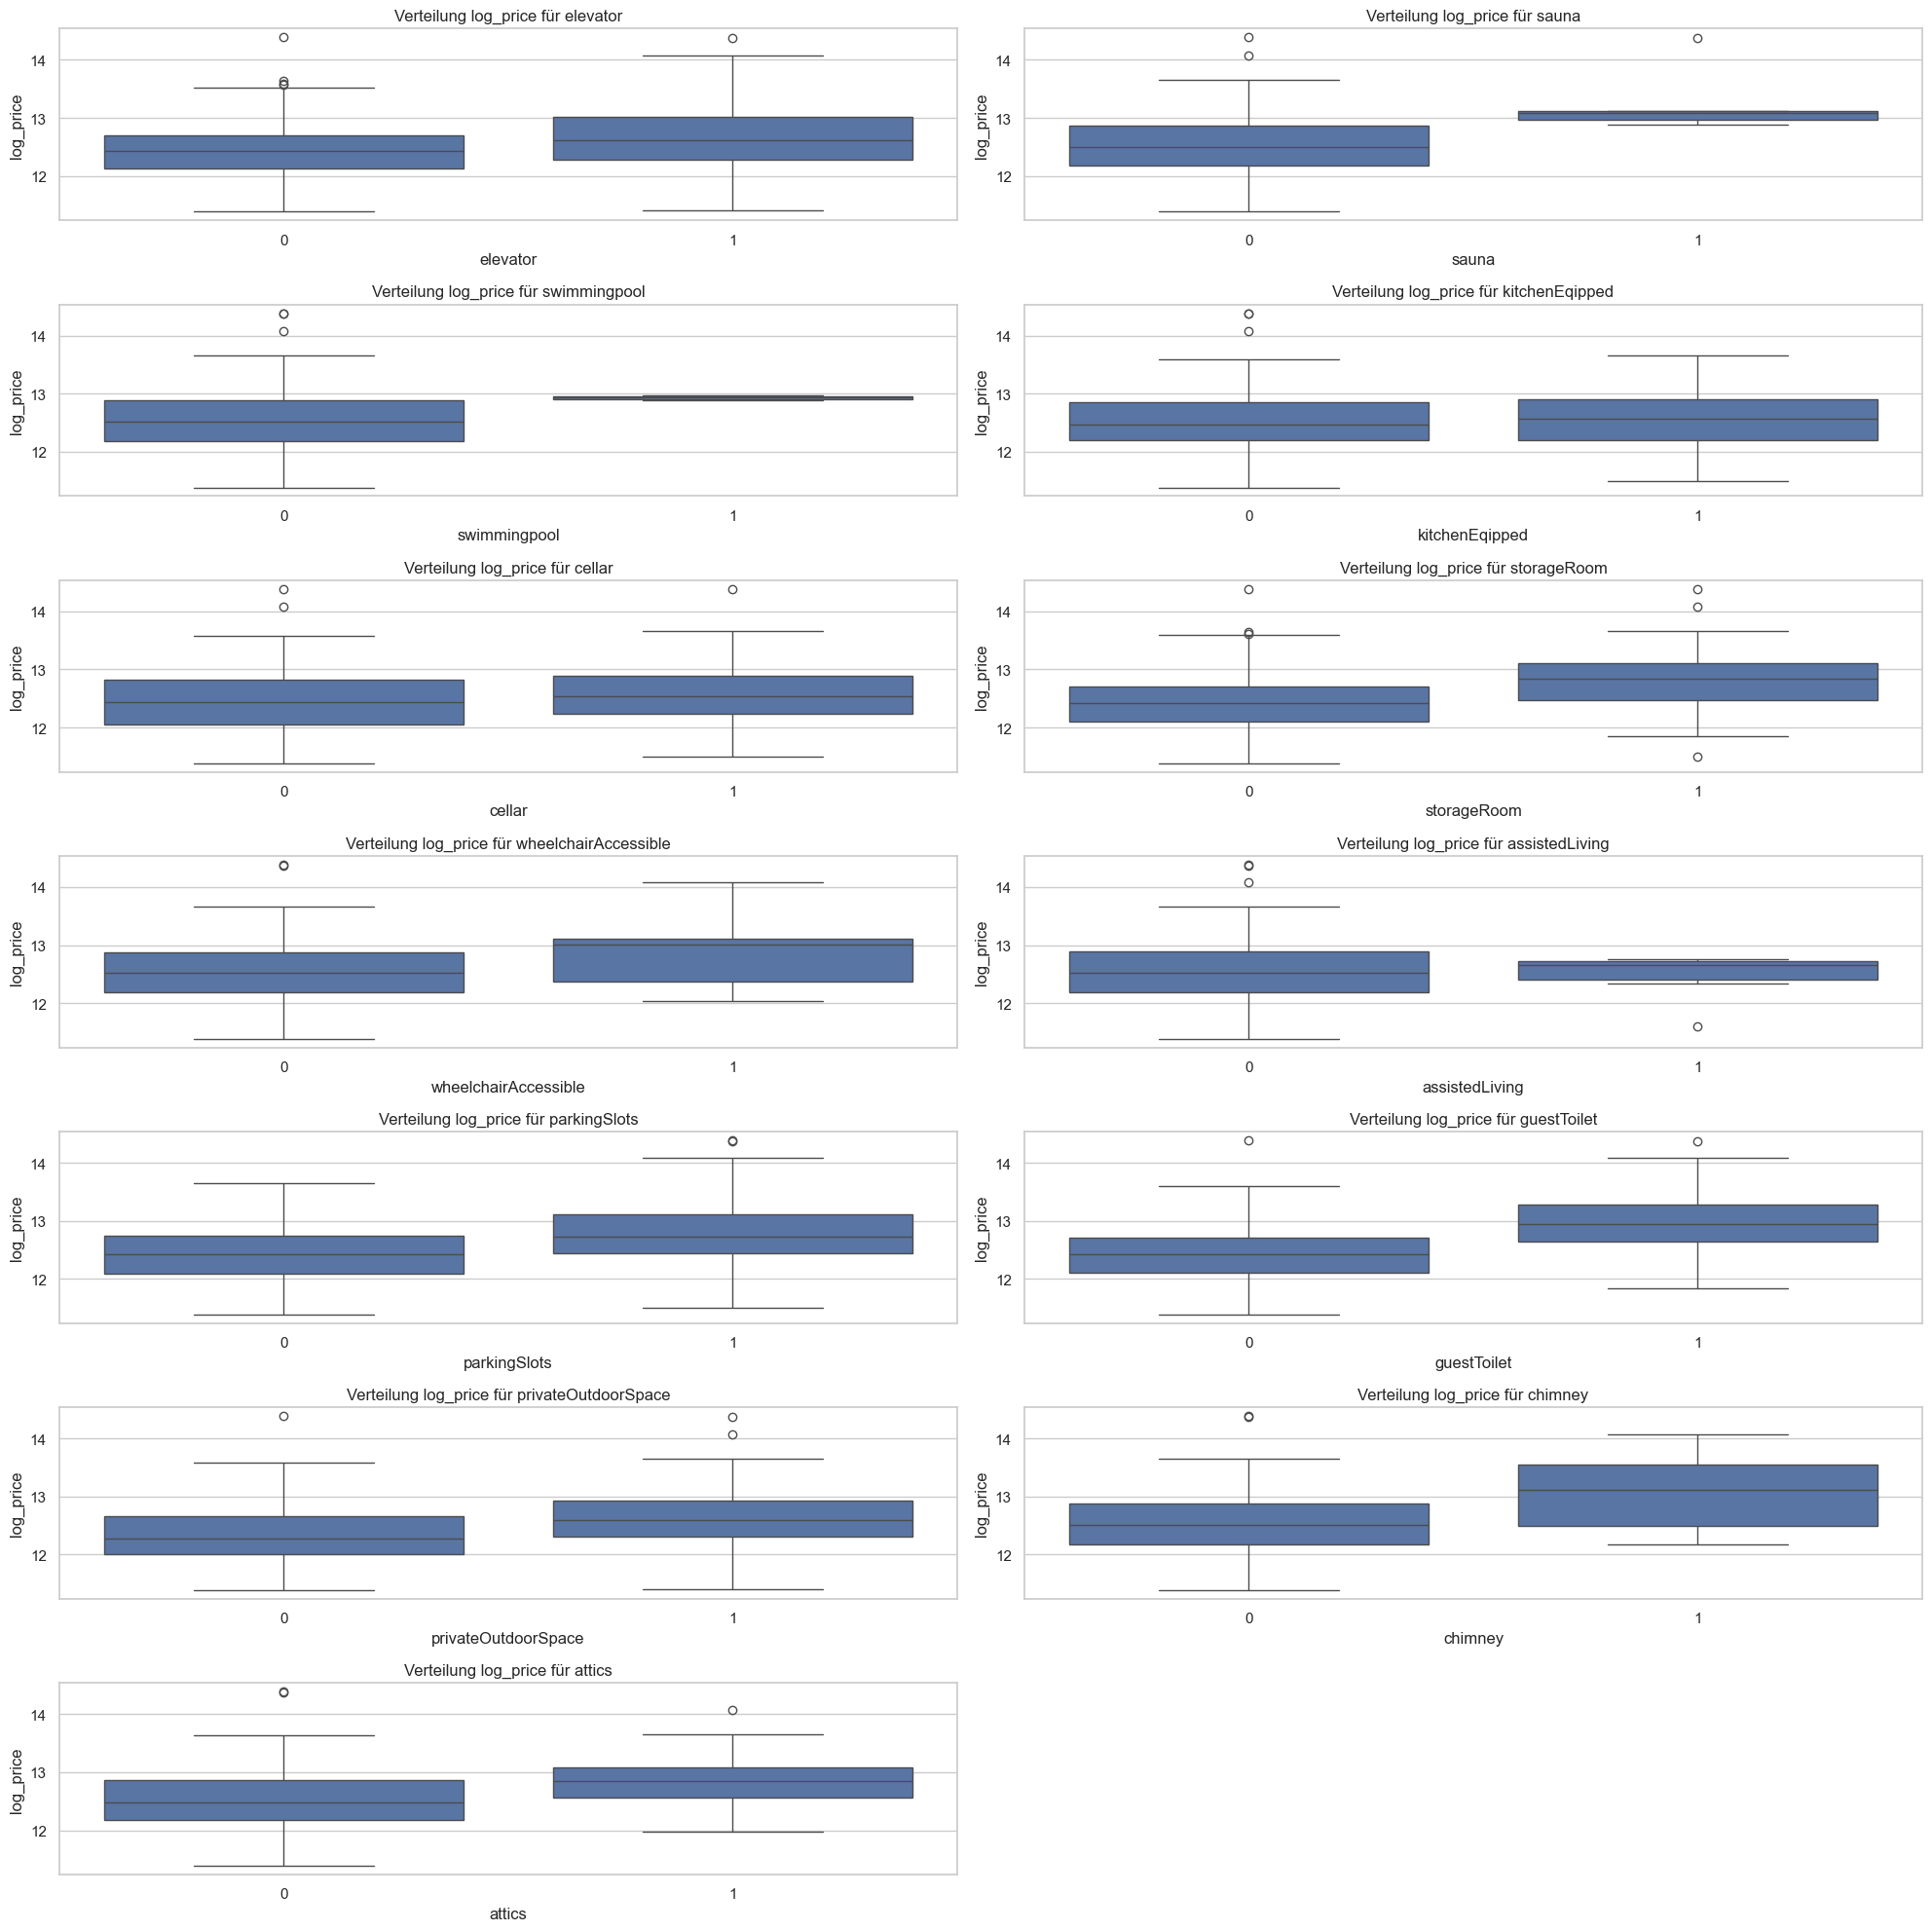

In [67]:
# Binäre Variablen
binaryVars = ['elevator',
 'sauna',
 'swimmingpool',
 'kitchenEqipped',
 'cellar',
 'storageRoom',
 'wheelchairAccessible',
 'assistedLiving',
 'parkingSlots',
 'guestToilet',
 'privateOutdoorSpace',
 'chimney',
 'attics']

# Untersuchung des Einflusses binärer Variablen auf den Preis
plt.figure(figsize=(20, 20))

for i, var in enumerate(binaryVars, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=var, y=df_train_price['log_price'], data=df_train_price) 
    plt.title(f'Verteilung log_price für {var}')
    plt.xlabel(var)
    plt.ylabel('log_price')

plt.tight_layout()
plt.show()

In Bezug auf den Preis lassen sich folgende Einflüsse feststellen:

**Mittlerer bis deutlicher Einfluss auf den Preis:**

Immobilien mit folgenden Merkmalen tendieren dazu, höhere Preise zu erzielen:
- Aufzug (elevator)
- Sauna (sauna)
- Schwimmingpool (swimmingpool)
- Abstellraum (storageRoom)
- Barrierefreiheit (wheelchairAccessible)
- Parkplätze (parkingSlots)
- Gästetoilette (guestToilet)
- Dachboden (attics)
- Kamin (chimney)

**Weniger deutlicher Einfluss auf den Preis:**

Immobilien mit folgenden Merkmalen tendieren dazu, höhere Preise zu erzielen:
- Betreutes Wohnen (assistedLiving)
- Private Außenfläche (privateOutdoorSpace)

**Kein oder kaum erkennbarer Einfluss auf den Preis:**
- Ausgestattete Küche (kitchenEquipped)
- Keller (cellar)


#### Einfluss Binärer Variablen auf Energieeffizienz

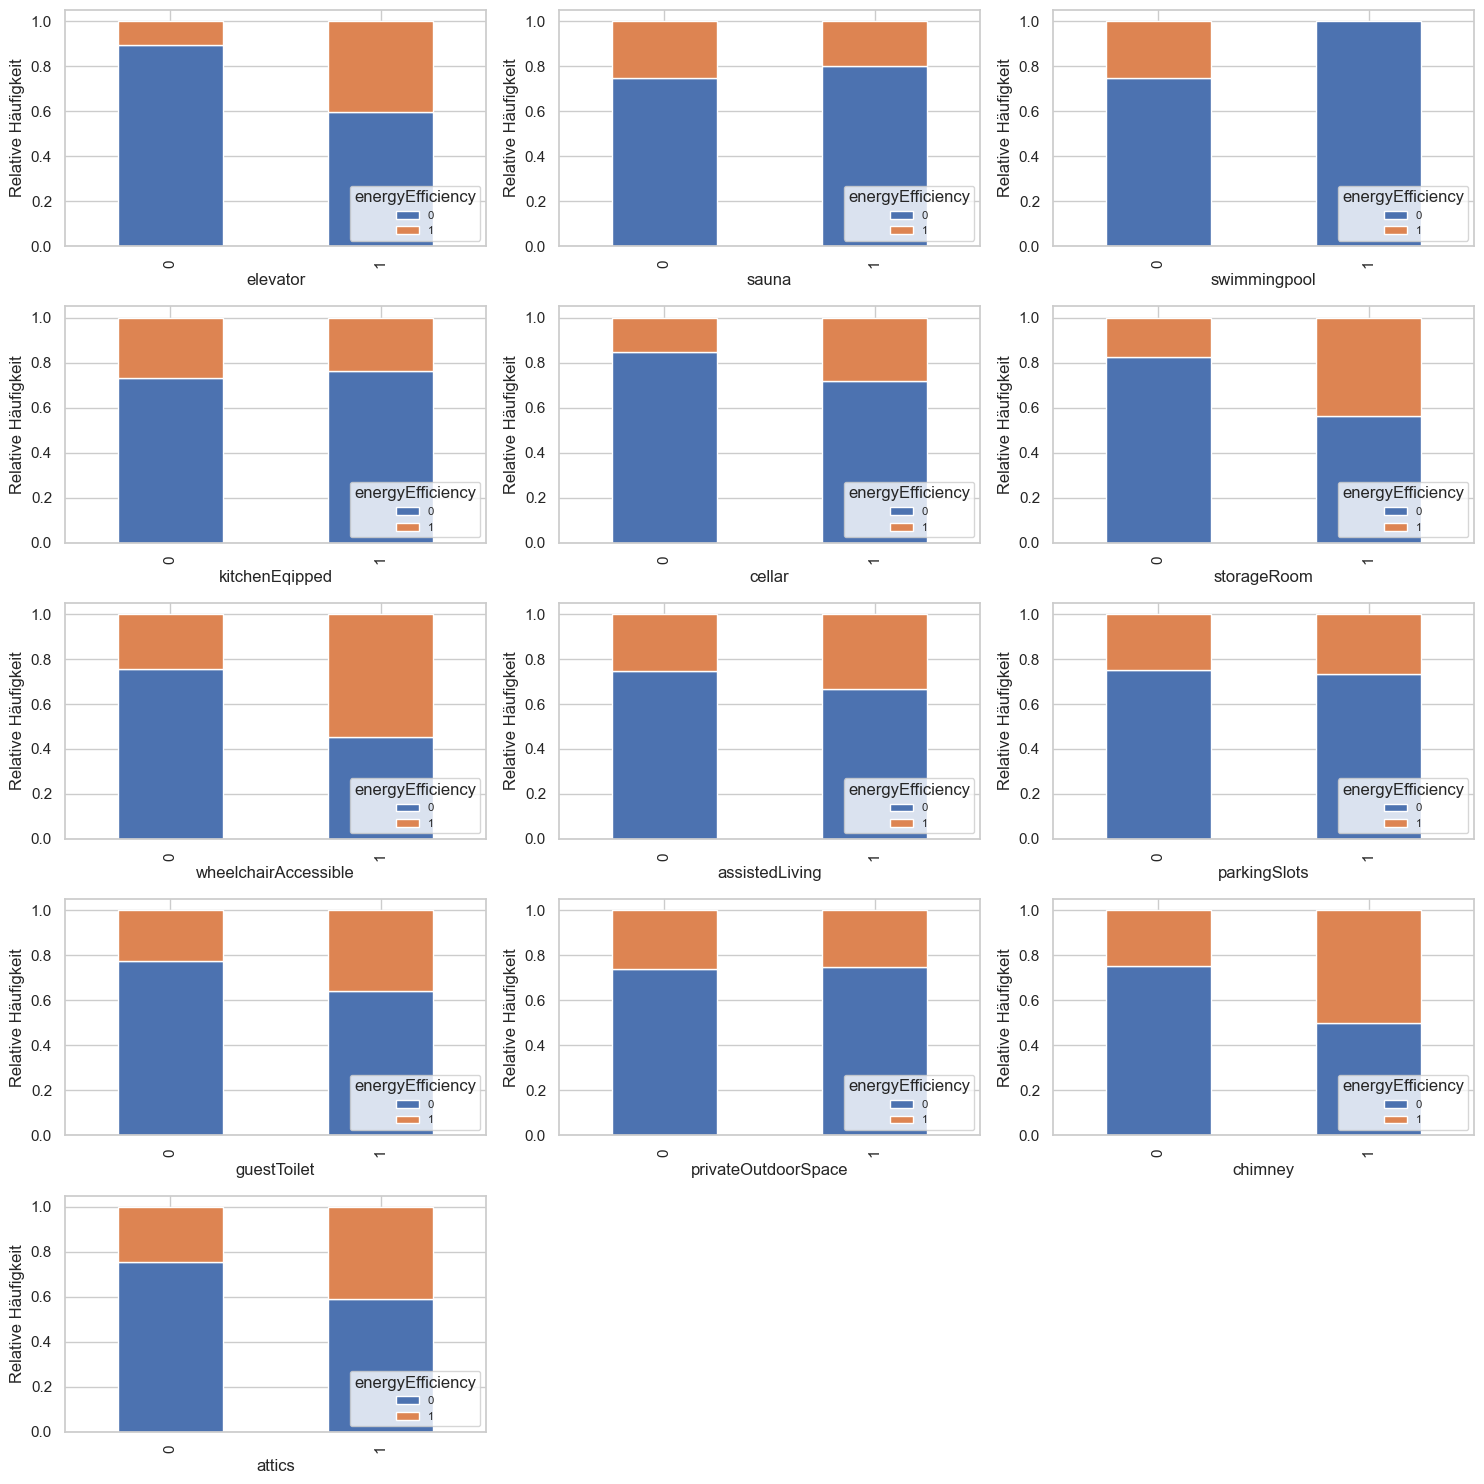

In [68]:
plt.figure(figsize=(15, 15))

for i, var in enumerate(binaryVars, 1):
    plt.subplot(5, 3, i)
   
    crosstab = pd.crosstab(X_train_energy[var], y_train_energy)
    
    crosstabRelative = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    crosstabRelative.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.xlabel(var)
    plt.ylabel('Relative Häufigkeit')
    plt.legend(title='energyEfficiency', loc='lower right', prop={'size': 8})

plt.tight_layout()
plt.show()

Energieeffiziente Immobilien weisen relativ häufiger Merkmale wie einen Aufzug (elevator), einen Abstellraum (storageRoom), einen Keller (cellar), einen Kamin (chimney) und Barrierefreiheit (wheelchairAccessible) auf. Außerdem befinden sie sich häufiger im Dachgeschoss (Attics).

Diese Merkmale könnten auf moderne Bauweisen oder höherer Bauqualität deuten, die unter Berücksichtigung neuerer bzw. höherer  Energieeffizienzstandards gebaut wurden.

### Relationships

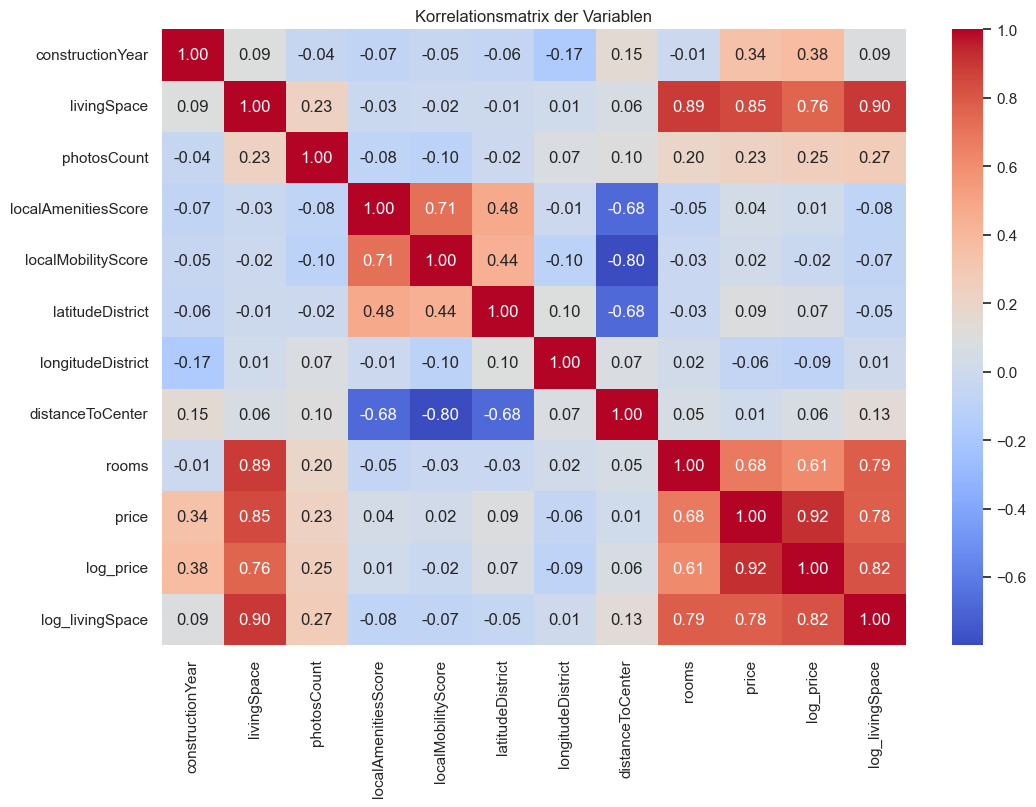

In [69]:
# Erstellen einer Korrelationsmatrix
correlationMatrix = df_train_price.select_dtypes(include=['float64', 'int']).corr()

# # Visualisierung der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Variablen")
plt.show()

- **Wohnfläche (livingSpace, log_livingSpace) und Zimmeranzahl (rooms):** Die starke positive Korrelation zwischen Wohnfläche und Zimmeranzahl bestätigt unsere Erwartung, dass größere Wohnungen in der Regel mehr Zimmer aufweisen.

  Um Multikollinearität in der Regressionsanalyse zu vermeiden, wurden zwei Ansätze diskutiert:
  - Entfernen einer der beiden Variablen.
  - Kombination der Variablen: Erstellung einer neuen Variable, die die durchschnittliche Raumgröße jedes Zimmers angibt, indem Wohnfläche durch die Anzahl der Zimmer geteilt wird.

- **Wohnfläche (livingSpace, log_livingSpace) und Preis (price, log_price):** Eine starke positive Korrelation zwischen Wohnfläche und Preis zeigt, dass größere Wohnungen tendenziell zu höheren Preisen verkauft werden.

- **Baujahr (constructionYear) und andere Merkmale:** Das Baujahr weist eine relativ geringe Korrelation mit Merkmalen wie Wohnfläche und Zimmeranzahl auf, was darauf schließen lässt, dass das Baujahr der Immobilien nicht maßgeblich mit diesen Eigenschaften zusammenhängt. Eine mittlere positive Korrelation zum Preis ist zu beobachten, was darauf hinweist, dass neuere Immobilien tendenziell zu höheren Preisen angeboten werden.

- **Lokale Annehmlichkeiten und Mobilität (localAmenitiesScore, localMobilityScore):** Eine hohe Korrelation zwischen diesen beiden Variablen deutet auf eine starke Verbindung zwischen der Qualität lokaler Annehmlichkeiten und der Mobilität hin.

- **Geografische Koordinaten (latitudeDistrict, longitudeDistrict) und lokale Bewertungen (localAmenitiesScore und localMobilityScore):** Eine mittlere Korrelation zwischen geografischen Koordinaten und lokalen Bewertungen könnte auf regionale Unterschiede in der Qualität von Annehmlichkeiten und Mobilität hindeuten.


## Model

### Select model

Modell 1: Mean (Mittelwert)

Muss noch angepasse werden, auf den Train-Datensatz und im Anschluss mit Test-Datensatz evaluiert werden.

In [70]:
# calculate the mean 
df['price'].mean()

319424.2626427406

In [71]:
# add the 'mean' to our DataFrame
df_mean = df.assign(mean = df['price'].mean())
df_mean.head()
df_mean.tail()

,location,Northeast,Northwest,Southeast,Southwest,energyEfficiency,price,constructionYear,livingSpace,energySources,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,distanceToCenter,district,rooms,energyClass,elevator,sauna,swimmingpool,kitchenEqipped,cellar,storageRoom,wheelchairAccessible,assistedLiving,parkingSlots,guestToilet,privateOutdoorSpace,chimney,attics,mean
608,3,0,0,1,0,0,319000.0,1935,85.0,1.0,7,7.7,9.6,49.44267,11.12304,3.510327,Zerzabelshof,3.0,6,0,0,0,0,1,0,0,0,0,0,1,0,0,319424.262643
609,4,0,0,0,1,0,330000.0,1998,92.0,2.0,19,7.6,9.7,49.43929,11.07396,1.438117,Steinbühl,4.0,5,0,0,0,0,0,0,0,0,1,0,1,0,0,319424.262643
610,3,0,0,1,0,0,199000.0,1967,75.0,2.0,7,6.0,9.3,49.40815,11.13376,6.396166,Langwasser,3.0,4,1,0,0,1,1,0,0,0,0,1,1,0,0,319424.262643
611,4,0,0,0,1,0,329900.0,1972,80.0,4.0,19,6.6,9.3,49.42333,11.02481,4.930702,Neuröthenbach,3.0,4,0,0,0,1,1,1,0,0,0,0,1,0,0,319424.262643
612,1,1,0,0,0,0,198000.0,1958,34.0,1.0,18,8.9,9.7,49.46468,11.08784,1.614009,Maxfeld,1.0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,319424.262643


### Training and validation

### Fit model

Muss noch auf dem Test-Datensatz angepasst werden


In [72]:
# estimate the model and save it as lm (linear model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols("price ~ livingSpace + guestToilet + constructionYear + privateOutdoorSpace + parkingSlots + sauna + elevator + latitudeDistrict + longitudeDistrict", data=df).fit()

In [73]:
# print regression results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     284.9
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          1.34e-210
Time:                        17:30:01   Log-Likelihood:                -7797.2
No. Observations:                 613   AIC:                         1.561e+04
Df Residuals:                     603   BIC:                         1.566e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

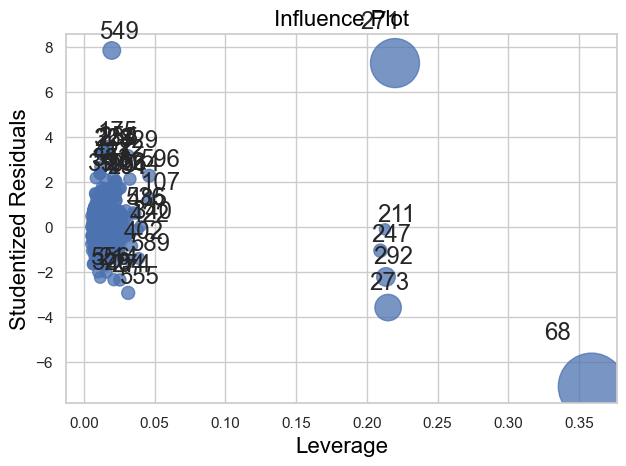

In [74]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [75]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(df["price"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n", 
    lm_cooksd[out_d])

Critical Cooks distance: 0.0065252854812398045
Int64Index([ 68, 100, 107, 172, 175, 191, 214, 235, 247, 252, 254, 268, 271,
            273, 274, 292, 294, 307, 323, 324, 329, 364, 382, 404, 427, 549,
            555, 589, 596, 605],
           dtype='int64') 
 [2.60756036 0.00689983 0.00791845 0.01584165 0.01988329 0.00944778
 0.0065725  0.01786056 0.02992422 0.01013133 0.01849397 0.01394659
 1.37448951 0.34655016 0.01451076 0.13412928 0.00944778 0.00730535
 0.01394659 0.00809892 0.03107596 0.01501408 0.00787875 0.01196206
 0.00826596 0.11256287 0.02763709 0.00797343 0.02474742 0.00733242]


In [76]:
## df
df.columns


Index(['location', 'Northeast', 'Northwest', 'Southeast', 'Southwest',
       'energyEfficiency', 'price', 'constructionYear', 'livingSpace',
       'energySources', 'photosCount', 'localAmenitiesScore',
       'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict',
       'distanceToCenter', 'district', 'rooms', 'energyClass', 'elevator',
       'sauna', 'swimmingpool', 'kitchenEqipped', 'cellar', 'storageRoom',
       'wheelchairAccessible', 'assistedLiving', 'parkingSlots', 'guestToilet',
       'privateOutdoorSpace', 'chimney', 'attics'],
      dtype='object')

In [77]:
## alternatives Modell (Aufwärtsprinzip) muss noch angepasst werden, da Df Model zu hoch:wenn die Aufnahme einer Variable zum höhreren R-squared führt, dann beleibt die drin
lm_auf=ols(
            "price ~ energyEfficiency + constructionYear + livingSpace + energySources + latitudeDistrict + longitudeDistrict + district + rooms + energyClass + floor + sauna +kitchenEqipped + storageRoom + attics"
            ,data=df
            ).fit()
print(lm_auf.summary())

PatsyError: Error evaluating factor: NameError: name 'floor' is not defined
    price ~ energyEfficiency + constructionYear + livingSpace + energySources + latitudeDistrict + longitudeDistrict + district + rooms + energyClass + floor + sauna +kitchenEqipped + storageRoom + attics
                                                                                                                                                        ^^^^^

In [ ]:
## alternatives Modell (Rückwärtsprinzip) muss noch angepasst werden: wenn das Entfernen einer Variable zum niedrigeren R-squared führt, dann beleibt die drin
lm_rueck=ols("price ~  constructionYear + livingSpace + energySources+ rooms+ energyClass+ floor+ sauna+ kitchenEqipped+ cellar+ storageRoom+  assistedLiving+ wheelchairAccessible+ parkingSlots+ guestToilet+ privateOutdoorSpace+ chimney + attics", data=df).fit()
print(lm_rueck.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     47.78
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          7.07e-154
Time:                        23:22:29   Log-Likelihood:                -6299.3
No. Observations:                 502   AIC:                         1.271e+04
Df Residuals:                     446   BIC:                         1.295e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
## todo: Latitude; longitude als nummerisch formatieren (x)


In [ ]:
df_train_price.columns

Index(['location', 'Northeast', 'Northwest', 'Southeast', 'Southwest',
       'energyEfficiency', 'constructionYear', 'livingSpace', 'energySources',
       'photosCount', 'localAmenitiesScore', 'localMobilityScore',
       'latitudeDistrict', 'longitudeDistrict', 'distanceToCenter', 'district',
       'rooms', 'energyClass', 'elevator', 'sauna', 'swimmingpool',
       'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       'chimney', 'attics', 'price', 'log_price', 'log_livingSpace'],
      dtype='object')

In [ ]:


features = ['log_livingSpace', 'constructionYear', 'swimmingpool', 'Northeast', 'Northwest', 'Southeast', 'energyEfficiency', 'distanceToCenter']

X = df_train_price[features]
y = np.log(df_train_price['price']) 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     311.4
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          8.32e-185
Time:                        12:08:14   Log-Likelihood:                 98.116
No. Observations:                 490   AIC:                            -178.2
Df Residuals:                     481   BIC:                            -140.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6512      0.650      5.614      0.000       2.373       4.929
log_livingSpace      0.9819      0.023     43.082      0.000       0.937       1.027
constructionYear     0.0023      0.000      7.053      0.000       0.002       0.003
swimmingpool         0.2261      0.142      1.589      0.113      -0.054       0.506
Northeast            0.1224      0.024      5.047      0.000       0.075       0.170
Northwest            0.0714      0.029      2.491      0.013       0.015       0.128
Southeast           -0.0530      0.025     -2.163      0.031      -0.101      -0.005
energyEfficiency     0.3162      0.025     12.503      0.000       0.267       0.366
distanceToCenter    -0.0049      0.005     -1.068      0.286      -0.014       0.004
==============================================================================
Omnibus:                        7.221   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               10.334
Skew:                          -0.078   Prob(JB):                      0.00570
Kurtosis:                       3.694   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_test_price['log_livingSpace'] = np.log(df_test_price['livingSpace'])
features = ['log_livingSpace', 'constructionYear', 'swimmingpool', 'location', 'energyEfficiency', 'distanceToCenter']

X = df_test_price[features]
y = np.log(df_test_price['price']) 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.09e-50
Time:                        17:46:21   Log-Likelihood:                 25.196
No. Observations:                 123   AIC:                            -38.39
Df Residuals:                     117   BIC:                            -21.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7363      1.415      0.520      0.604      -2.066       3.539
log_livingSpace      1.0390      0.045     23.324      0.000       0.951       1.127
constructionYear     0.0038      0.001      5.431      0.000       0.002       0.005
swimmingpool      2.112e-15   8.62e-17     24.509      0.000    1.94e-15    2.28e-15
location            -0.0694      0.016     -4.295      0.000      -0.101      -0.037
energyEfficiency     0.2442      0.057      4.280      0.000       0.131       0.357
distanceToCenter    -0.0171      0.010     -1.791      0.076      -0.036       0.002
==============================================================================
Omnibus:                       19.169   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.392
Skew:                          -0.757   Prob(JB):                     4.15e-07
Kurtosis:                       4.855   Cond. No.                     3.32e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.36e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Logistische Regression

In [132]:
clf = LogisticRegressionCV(max_iter=100, Cs=[1.1**i for i in range(-100, 100)], cv=10, refit=True)

features_energy = ['constructionYear', 'energySources',
       #             'livingSpace', 'photosCount', 'localMobilityScore', 'rooms', 'elevator', 'sauna', 'swimmingpool',
       # 'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       # 'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       # 'chimney', 'attics'
                   ]

scaler = StandardScaler()
X_train_energy_sc = scaler.fit_transform(X_train_energy[features_energy])
X_test_energy_sc = scaler.transform(X_test_energy[features_energy])

clf.fit(X_train_energy_sc, y_train_energy)

print(f"Best C value: {clf.C_}")

Best C value: [0.08390545]


In [133]:
clf.score(X_test_energy_sc, y_test_energy)

0.9349593495934959

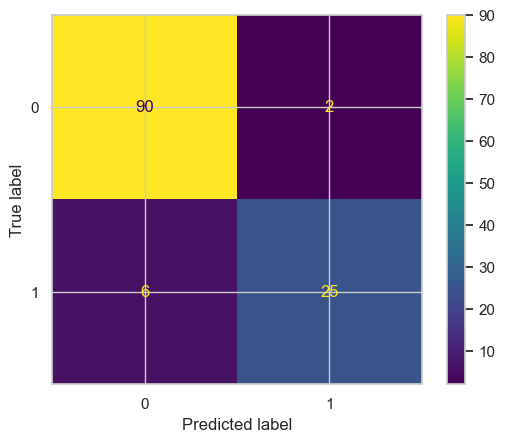

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test_energy_sc, y_test_energy);

In [135]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_energy_sc)

print(classification_report(y_test_energy, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.94      0.98      0.96        92
         Yes       0.93      0.81      0.86        31

    accuracy                           0.93       123
   macro avg       0.93      0.89      0.91       123
weighted avg       0.93      0.93      0.93       123



In [136]:
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning) # Nicht benötigt in diesem Fall

In [137]:
def predict_energy(thresh, **kwargs):
    pred_proba = clf.predict_proba(X_test_energy_sc)
    df_thresh = pd.DataFrame({'y_pred': pred_proba[:,1] > thresh})

    return classification_report(y_test_energy, df_thresh['y_pred'], output_dict=True)

In [140]:
thresh_step = 0.001
list_accuracies = []
list_thresh = []

for thresh in np.arange(0.0, 1, thresh_step):
    thresh = round(thresh, 3)
    accuracy = predict_energy(thresh)["accuracy"]
    list_accuracies.append(accuracy)
    list_thresh.append(thresh)

acc_df = pd.DataFrame(data={"accuracy": list_accuracies, "threshold": list_thresh})

# Beste Accuracy zuerst anzeigen
acc_df.sort_values("accuracy", ascending=False).head(10)

,accuracy,threshold
500,0.934959,0.500
510,0.934959,0.510
538,0.934959,0.538
539,0.934959,0.539
540,0.934959,0.540
541,0.934959,0.541
514,0.934959,0.514
513,0.934959,0.513
512,0.934959,0.512
511,0.934959,0.511


In [141]:
alt.Chart(acc_df).mark_line().encode(
    x="threshold", y="accuracy"
    ).properties(
        width=1000,
        height=400
    )

alt.Chart(...)